# CS156 Second Pipeline Assignment

## Table of Contents
1. [Section 1: Data Explanation](#Section-1:-Data-Explanation)
    - [Overview of the Data](#Overview-of-the-Data)
    - [Rationale for Data Selection](#Rationale-for-Data-Selection)
    - [Data Acquisition](#Data-Acquisition)
    - [Data Sampling](#Data-Sampling)
    - [Ethical Considerations](#Ethical-Considerations)<br><br>
2. [Section 2: Data Ingestion and Transformation](#Section-2:-Data-Ingestion-and-Transformation)<br>
    - [Setting Up the Environment](#Setting-Up-the-Environment)
    - [Importing Libraries](#Importing-Libraries)
    - [Extracting Event Properties](#Extracting-Event-Properties)
    - [Loading and Parsing the Calendar Data](#Loading-and-Parsing-the-Calendar-Data)
    - [Extracting Event Details](#Extracting-Event-Details)
    - [Transforming Data into a Pandas DataFrame](#Transforming-Data-into-a-Pandas-DataFrame)<br><br>
3. [Section 3: Data Cleaning, Pre-Processing, and Exploration (First and Second Pipelines)](#Section-3:-Data-Cleaning,-Pre-Processing,-and-Exploration-(First-and-Second-Pipelines))
    - [Overview](#Overview)
    - [Cleaning Steps](#Cleaning-Steps)
    - [Pre-Processing Steps](#Pre-Processing-Steps)
    - [Feature Engineering Steps](#Feature-Engineering-Steps)
    - [Aggregating Daily Summary](#Aggregating-Daily-Summary)
    - [Labeling the Daily Summary Dataset](#Labeling-the-Daily-Summary-Dataset)
    - [Exploratory Analysis on the First Pipeline Data](#Exploratory-Analysis-on-the-First-Pipeline-Data)
    - [Data Cleaning, Pre-Processing, and Exploration in the Second Pipeline](#Data-Cleaning,-Preprocessing,-and-Exploration-in-the-Second-Pipeline)<br><br>
4. [Section 4: Task Discussion and Data Splitting for Model Training](#Section-4:-Task-Discussion-and-Data-Splitting-for-Model-Training)
5. [Section 5: Model Selection and Construction (Transitioning From First Pipeline)](#Section-5:-Model-Selection-and-Construction-(Transitioning-From-First-Pipeline))
6. [Section 6: Models' Training, Cross-Validation, and Hyperparameters' Tuning](#Section-6:-Models'-Training,-Cross-Validation,-and-Hyperparameters'-Tuning)
7. [Section 7: Predictions for Out of Sample Data and Performance Evaluation for Models](#Section-7:-Predictions-for-Out-of-Sample-Data-and-Performance-Evaluation-for-Models)
8. [Section 8: Visualization, Discussion and Comparison of Conclusions](#Section-8:-Visualization,-Discussion-and-Comparison-of-Conclusions)
9. [Section 9: Executive Summary - Mood Prediction Based on Calendar Events](#Section-9:-Executive-Summary---Mood-Prediction-Based-on-Calendar-Events)
10. [Section 10: References](#Section-10:-References)
11. [Datasets](#Datasets)
12. [Use of AI Tools Statement](#Use-of-AI-Tools-Statement)

## Section 1: Data Explanation

### Overview of the Data

For this project, I have chosen to analyze my personal calendar events as the primary dataset. This dataset comprises entries from my Google Calendar, associated with my school email address, miray@uni.minerva.edu. The data spans from June 2021 to March 21, 2024, encompassing a wide array of events that mark my academic, personal, and social engagements during this period. In the dataset, each row shows an event with multiple features including its date, start time, end time, summary, number of attendees, status, etc.

### Rationale for Data Selection

The choice of calendar events as my data source is motivated by the hypothesis that the nature and density of daily activities have a tangible impact on my mood. By analyzing this dataset, I aim to uncover patterns and insights that could predict my mood variations over and within each day, leveraging the rich contextual details embedded in each calendar entry. This project intends to bridge the quantitative and qualitative aspects of event scheduling (e.g., number of events, average length of events, the descriptions of events, etc.) with the qualitative experience of my mood fluctuations over different days and daily segments. 

This dataset is particularly suitable for this analysis as it encapsulates a broad spectrum of my life's facets over a significant period. It includes academic deadlines, social engagements, personal tasks, and leisure activities, offering a holistic view of my routine and its potential effects on mood across different days and segments of a day. Ultimately, this project is about harnessing data to enhance my well-being and making informed decisions to predict and improve my daily feelings. I believe recognizing patterns that lead to negative or positive daily moods allows me to adjust my schedule strategically.

### Data Acquisition

I obtained the calendar data using Google Takeout, a service by Google that allows users to export their data from the various Google services they use. I specifically requested an export of calendar events from my most active email account, which is predominantly used for school-related activities and personal management. This method comprehensively extracted my digital engagements over the specified period.

### Data Sampling

I methodologically sampled this dataset to ensure a manageable yet representative selection of my daily engagements. Specifically, the dataset includes events from June 29, 2021, to March 21, 2024, with ~14 values removed due to the unavailability of event dates and times (important identification features). The extraction process further involved grouping events by date and 3 segments per date to focus my analysis only on days with at least one scheduled event. I chose this approach to facilitate the analysis of daily and daily-segmental moods based on the nature and volume of activities planned for each day and segment.

### Ethical Considerations

In selecting this dataset, I have ensured that the data is personal but not private, adhering to the assignment's guidelines. The dataset does not include sensitive or confidential information and has been filtered to exclude entries that might inadvertently reveal personal details about third parties or sensitive personal information.

## Section 2: Data Ingestion and Transformation

### Setting Up the Environment

Before diving into the data transformation, the necessary Python packages are installed using pip. "icalendar" parses the iCalendar (.ics) files, a common format for calendar data. "pandas" is a powerful library for data manipulation and analysis, which will help in organizing the calendar data into a structured format.

In [1]:
pip install icalendar pandas

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

The "icalendar" library is imported to handle the .ics file format, allowing us to parse the calendar data. "pandas" is used for data frame manipulation, making it easier to work with the data in Python. The "datetime" module is imported to handle date and time information, which is crucial for processing calendar events.

In [2]:
# Libraries

from icalendar import Calendar, Event
from datetime import datetime
import pandas as pd
import numpy as np

### Extracting Event Properties

Here, I defined a function, "get_property_value," to extract properties from each calendar event safely. Special handling is incorporated for date-related properties (dtstart, dtend, dtstamp, created, last-modified), converting them to pandas datetime objects for easier manipulation. Other properties are returned as strings. This ensures that the data is consistently formatted and null-safe.

In [3]:
# Function to safely get property values

def get_property_value(component, property_name):
    prop = component.get(property_name)
    if prop:
        if property_name in ['dtstart', 'dtend', 'dtstamp', 'created', 'last-modified']:
            # Convert to datetime if the property is a date type
            return pd.to_datetime(prop.dt)
        else:
            # Return as string for all other types
            return str(prop)
    return None

### Loading and Parsing the Calendar Data

The calendar file is opened in binary read mode. The "Calendar.from_ical" method parses the .ics file, converting it into a format that can be iteratively processed to extract event details.

In [4]:
# Load the ICS file

with open('/Users/mirayozcan/Desktop/miray@uni.minerva.edu.ics', 'rb') as f: # Use 'rb' for binary read mode
    gcal = Calendar.from_ical(f.read())

### Extracting Event Details

A list, "events_data," is initialized to hold the data for each event. The script iterates over components in the parsed calendar, focusing on those labeled "VEVENT" which denote individual events. For each event, relevant details are extracted using the "get_property_value" function and stored in a dictionary. These dictionaries are then appended to the "events_data" list, creating a collection of event records.

In [5]:
# Create a list to hold all the event data
events_data = []

# Parse the events from the calendar
for component in gcal.walk():
    if component.name == "VEVENT":
        event = {
            'summary': get_property_value(component, 'summary'),
            'dtstart': get_property_value(component, 'dtstart'),
            'dtend': get_property_value(component, 'dtend'),
            'dtstamp': get_property_value(component, 'dtstamp'),
            'organizer': get_property_value(component, 'organizer'),
            'uid': get_property_value(component, 'uid'),
            'attendee': ";".join([str(a) for a in component.get('attendee', [])]),
            'created': get_property_value(component, 'created'),
            'description': get_property_value(component, 'description'),
            'last-modified': get_property_value(component, 'last-modified'),
            'location': get_property_value(component, 'location'),
            'sequence': get_property_value(component, 'sequence'),
            'status': get_property_value(component, 'status'),
            'transp': get_property_value(component, 'transp')
        }
        events_data.append(event)

### Transforming Data into a Pandas DataFrame

The list of event dictionaries is converted into a "pandas DataFrame," "df_events," providing a tabular representation of the calendar events. This format is well-suited for analysis and manipulation using "pandas" functionalities. The "head()" method displays the first few rows of the data frame, offering a preview of the structured data.

In [6]:
# Convert the events data into a pandas DataFrame

df_events = pd.DataFrame(events_data)
df_events.head()

,summary,dtstart,dtend,dtstamp,organizer,uid,attendee,created,description,last-modified,location,sequence,status,transp
0,İsil and Miray Özcan,2021-08-25 07:15:00+00:00,2021-08-25 07:30:00+00:00,2024-02-18 16:50:12+00:00,mailto:miray@uni.minerva.edu,u27vltd63s8lihre9m8qgai0h8@google.com,mailto:nisilozcan@gmail.com;mailto:miray@uni.m...,2021-08-23 15:55:07+00:00,Event Name: 15 Minute Meeting\n\nNeed to make ...,2021-08-23 15:55:07+00:00,None,None,CONFIRMED,OPAQUE
1,Time Management Lab,2021-09-27 23:00:00+00:00,2021-09-28 00:00:00+00:00,2024-02-18 16:50:12+00:00,None,4igsh1itqeleukn7j13ci7lbq7@google.com,,2021-09-26 18:21:22+00:00,Do you always feel like you're running out o...,2021-09-27 23:02:25+00:00,None,None,CONFIRMED,OPAQUE
2,SS50 AND CS50 CLASSES,2021-10-04 16:00:00+00:00,2021-10-04 19:30:00+00:00,2024-02-18 16:50:12+00:00,None,11AC5951-5BF0-4981-8F43-1315CF7BCB60,,2021-09-27 23:41:59+00:00,None,2021-09-27 23:42:21+00:00,None,1,CONFIRMED,OPAQUE
3,Relaxation Time,2021-10-05 03:30:00+00:00,2021-10-05 04:30:00+00:00,2024-02-18 16:50:12+00:00,None,98AFF40D-AA40-42DC-9853-1BCECABEF32B,,2021-09-27 23:43:50+00:00,None,2021-09-27 23:44:11+00:00,None,1,CONFIRMED,OPAQUE
4,Wake Up,2021-10-05 14:45:00+00:00,2021-10-05 15:00:00+00:00,2024-02-18 16:50:12+00:00,None,58876813-C548-4619-804E-39F4281C16B5,,2021-09-27 23:45:06+00:00,None,2021-09-27 23:45:06+00:00,None,1,CONFIRMED,OPAQUE


## Section 3: Data Cleaning, Pre-Processing, and Exploration (First and Second Pipelines)

### 1- Data Cleaning, Pre-Processing, and Exploration in the First Pipeline

### Overview

The initial dataset, obtained from a .ics file and converted to .csv format for easier manipulation, required several cleaning and pre-processing steps to prepare it for analysis. The goal was to ensure data quality by removing inaccuracies and inconsistencies, such as missing values and duplicates, and to structure the dataset for effective analysis. Later, I utilized WPS office to perform data cleaning and pre-processing operations.

### Cleaning Steps

1. **Removing Incomplete Events:** Initially, 14 rows with missing critical information such as date, duration, and start-end times were identified and removed. This step was crucial to ensure that the dataset only contained events that could be analyzed effectively.<br><br>
2. **Eliminating Duplicates:** 26 duplicate entries, identified by identical summaries, dates, start, and end times, were removed. This step prevented skewed analysis results due to redundant data.

### Pre-Processing Steps

1. **Creating Time-Related Columns:** New columns were created for the date, start time, end time, duration, and number of attendees for the events. These transformations were essential for later analysis, particularly for calculating event durations and scheduling patterns.<br><br>
2. **Handling Missing Values:** After initial cleaning, further checks were performed to clean any missing values in the date, start time, end time, and duration columns, ensuring the dataset's completeness.<br><br>
3. **Exclusion of Location Data:** Although the location data might have offered additional insights, it was excluded due to its sparse availability, focusing the analysis on time and participation metrics.<br><br>
4. **Final Dataset Preparation:** The dataset was refined to include events until February 15, ensuring the analysis was current and relevant.

### Feature Engineering Steps

With a cleaned and pre-processed dataset, several features were engineered to aid in the analysis:

1. **Date and Time Features:** The date column was converted to the datetime format to facilitate time-series analysis. Additional columns were created to capture the day of the month and the day of the week, providing insights into how event scheduling varies over time.<br><br>
2. **Hourly Features:** The start and end times were parsed to extract the hour, allowing for the analysis of when events typically begin and end.

In [7]:
# Read the cleaned and pre-processed CSV file
df = pd.read_csv('/Users/mirayozcan/Desktop/events_cleaned_finalized.csv')

df.head()

,event_id,date,start_time,end_time,duration,n_attendees,description,summary
0,1,8/25/2021,7:15:00,7:30:00,15,2.0,Event Name: 15 Minute Meeting\n\nNeed to make ...,İsil and Miray Özcan
1,2,9/27/2021,23:00:00,0:00:00,60,1.0,Do you always feel like you're running out of ...,Time Management Lab
2,3,10/4/2021,16:00:00,19:30:00,210,1.0,NaN,SS50 AND CS50 CLASSES
3,4,10/5/2021,3:30:00,4:30:00,60,1.0,NaN,Relaxation Time
4,5,10/5/2021,14:45:00,15:00:00,15,1.0,NaN,Wake Up


### Aggregating Daily Summary

- **day_of_month** Represents the day of the month for each event, allowing analysis of activity patterns at a monthly granularity.<br><br>
- **day_of_week:** Indicates the day of the week, with 1 for Monday and 7 for Sunday, to explore how schedules vary across the week.<br><br>
- **n_events:** The total number of events per day, offering a sense of how packed each day is.<br><br>
- **event_ids:** A concatenation of event IDs for the day, referring to individual events if needed.<br><br>
- **total_duration:** The sum of durations for all events in a day (in minutes), indicating how much time scheduled activities occupy.<br><br>
- **avg_duration:** The average duration of events on that day (in minutes), providing a measure of typical event length.<br><br>
- **start_first_event:** The hour at which the day's first event starts, helping to understand how early activities begin.<br><br>
- **end_last_event:** The hour the last event of the day ends, indicating how late activities are scheduled.<br><br>
- **longest_event:** The duration of the longest event of the day (in minutes), highlighting the most significant time commitment.<br><br>
- **total_attendees:** The sum of attendees for all events, which could correlate with the day's social intensity.<br><br>
- **avg_attendees:** The average number of attendees per event, offering insight into the typical event size.

In [8]:
import pandas as pd

# Convert 'date' column to datetime format for easier manipulation
df['date'] = pd.to_datetime(df['date'])

# Extract and create features related to the timing of events
df['day_of_month'] = df['date'].dt.day  # Day of the month for each event
df['day_of_week'] = df['date'].dt.dayofweek + 1  # Day of the week, adjusted to make Monday=1

# Extract start and end hours from the time strings, ensuring to handle non-numeric characters correctly
df['start_hour'] = df['start_time'].str.split(':').str[0].astype(int)  # Hour the event starts
df['end_hour'] = df['end_time'].str.split(':').str[0].astype(int)  # Hour the event ends

# Aggregate data by date to create a daily summary
daily_summary = df.groupby('date').agg(
    day_of_month=('day_of_month', 'first'),  # Day of the month for each aggregated day
    day_of_week=('day_of_week', 'first'),  # Day of the week for each aggregated day
    n_events=('date', 'size'),  # Total number of events per day
    event_ids=('event_id', lambda x: ', '.join(x.astype(str))),  # Concatenated IDs of events
    total_duration=('duration', 'sum'),  # Total duration of all events in a day
    avg_duration=('duration', 'mean'),  # Average duration of events per day
    start_first_event=('start_hour', 'min'),  # Start hour of the first event
    end_last_event=('end_hour', 'max'),  # End hour of the last event
    longest_event=('duration', 'max'),  # Duration of the longest event
    total_attendees=('n_attendees', 'sum'),  # Total number of attendees in all events
    avg_attendees=('n_attendees', 'mean')  # Average number of attendees per event
).reset_index()

# Sort the daily summary by date for chronological analysis
daily_summary_sorted = daily_summary.sort_values(by='date', ascending=True).reset_index(drop=True)

# Display the first few rows of the daily summary to verify the structure
daily_summary_sorted.head()

,date,day_of_month,day_of_week,n_events,event_ids,total_duration,avg_duration,start_first_event,end_last_event,longest_event,total_attendees,avg_attendees
0,2021-06-29,29,2,1,324,15,15.000000,20,20,15,2.0,2.000000
1,2021-07-23,23,5,1,309,15,15.000000,21,21,15,2.0,2.000000
2,2021-08-12,12,4,2,"295, 310",120,60.000000,4,5,60,4.0,2.000000
3,2021-08-23,23,1,1,291,60,60.000000,0,1,60,1.0,1.000000
4,2021-08-25,25,3,3,"1, 299, 300",265,88.333333,0,7,160,4.0,1.333333


This section meticulously processed and transformed the event data into a daily summary format, ready for further analysis. The aggregated data encapsulates both quantitative metrics (e.g., number of events, total and average durations) and qualitative aspects (e.g., start of the first event, end of the last event), providing a comprehensive overview of each day's schedule. These features are pivotal for analyzing how different types of days might influence mood, forming the basis for the predictive modeling to follow. This step not only refines the dataset for machine learning but also aligns it with the project's goal of understanding and potentially improving daily mood through schedule adjustments.

### Labeling the Daily Summary Dataset

Labeling the dataset is a critical step in preparing for supervised learning tasks. In this project, the goal was to predict the daily mood based on calendar events. To achieve this, I labeled each day in the dataset with a mood category based on the nature and scheduling of events. The mood categories defined were **Busy**, **Productive**, **Relaxed**, and **Overwhelmed**.

The labeling process involved a detailed review of the sorted daily summaries, considering quantitative data (e.g., number of events, total duration) and qualitative aspects (e.g., types of events, spacing between events). Additionally, personal recollection of each day's overall mood and impact was considered to assign the most fitting label. The criteria for each mood category were as follows:
1. **Busy:** Days marked by a high number of events and a significant total duration, often with minimal gaps between events, indicating a tightly packed schedule. <br>**Indicator:** High number of events and total duration, minimal rest periods.<br><br>

2. **Productive:** Characterized by days with a moderate number of events, focusing on meaningful activities that contribute towards personal or professional goals. <br>**Indicator:** Moderate number of significant events, focus on goal-oriented activities.<br><br>

3. **Relaxed:** Days with fewer events, often involving leisure or personal care activities, and characterized by ample downtime. <br>**Indicator:** Few events, significant gaps between events, presence of leisure activities.<br><br>

4. **Overwhelmed:** Days that feel excessively demanding, potentially due to the nature of the events rather than just the schedule density. These might include high-stakes meetings or deadlines. <br>**Indicator:** High-stress events, possibly fewer but longer and more demanding activities, ending late.

I conducted the labeling manually to incorporate a nuanced understanding and personal memory of each day’s impact on mood. This approach ensured that the labels reflected a comprehensive assessment of each day's schedule and its emotional impact.

In [9]:
# Exporting the data for manual labeling
daily_summary_sorted.to_csv('/Users/mirayozcan/Desktop/daily_summary_sorted.csv', index=False)

After carefully reviewing each day's summary and considering both the structured data and personal recall, I assigned labels to each row in the dataset. This process required a thoughtful balance between the objective data provided by the calendar events and the subjective experience of each day.

After labeling the dataset, I imported it back into Python for further analysis. This step marked the transition from data preparation to the application of machine learning models.

In [10]:
# Re-importing the labeled dataset
df_labeled = pd.read_csv('/Users/mirayozcan/Desktop/daily_summary_sorted_labeled.csv')

df_labeled.head()

,date,day_m,day_w,n_events,event_ids,sum_duration,avg_duration,start_first_event,end_last_event,longest_event,sum_attendees,avg_attendees,mood
0,6/29/2021,29,2,1,289,15,15.0,20,20,15,2,2.0,Relaxed
1,7/23/2021,23,5,1,275,15,15.0,21,21,15,2,2.0,Relaxed
2,8/12/2021,12,4,2,"262, 276",120,60.0,4,5,60,4,2.0,Overwhelmed
3,8/23/2021,23,1,1,258,60,60.0,0,1,60,1,1.0,Relaxed
4,8/25/2021,25,3,2,"1, 266",265,132.5,7,7,250,3,1.5,Relaxed


### Exploratory Analysis on the First Pipeline Data

In [11]:
# Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

#### Bar Chart: Distribution of Moods

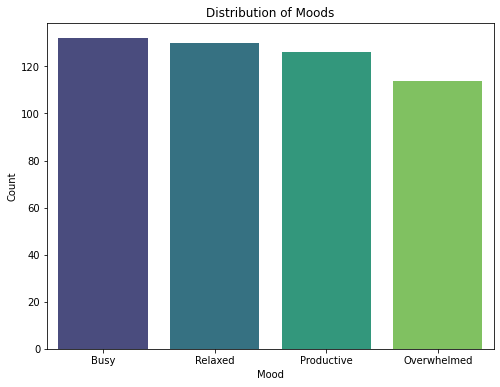

In [12]:
# Mood distribution
mood_counts = df_labeled['mood'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=mood_counts.index, y=mood_counts.values, palette="viridis")
plt.title('Distribution of Moods')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.show()

The bar chart represents the frequency of each mood category within the dataset. The length of each bar corresponds to the count of days categorized by the respective mood. This visualization is crucial as it illustrates the balance of mood occurrences over the analyzed period, which is a factor that will reduce the bias in our conclusions after training the model and looking at the results.

#### Mood Distribution by Day of the Week

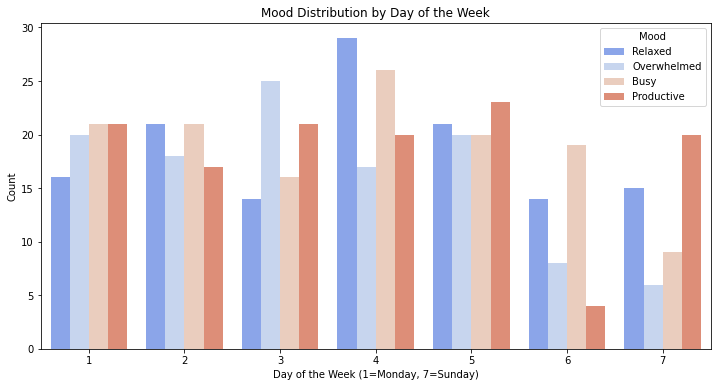

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='day_w', hue='mood', data=df_labeled, palette="coolwarm")
plt.title('Mood Distribution by Day of the Week')
plt.xlabel('Day of the Week (1=Monday, 7=Sunday)')
plt.ylabel('Count')
plt.legend(title='Mood')
plt.show()

The distribution of moods varies across the week, indicating a potential pattern or trend in how different moods are experienced on specific days. Some moods appear more frequently on certain days. For instance, the 'Productive' mood peaks mid-week, which correlates with the traditional work or school week's flow, where individuals gain momentum post-Monday. There is a noticeable change in mood frequencies on weekends (days 6 and 7), where 'Relaxed' moods may increase due to typical social norms of weekends being days of rest or leisure. The 'Overwhelmed' mood is significant around the middle of the week, which could be associated with the culmination of workload or stress. The 'Busy' mood is consistent throughout the week with slight variations, suggesting a relatively stable activity level across different days. This mood distribution can inform personal or organizational scheduling by highlighting days where there might be a tendency to feel more overwhelmed or productive, allowing for better planning to manage stress and enhance productivity.

#### Mood Transition Matrix

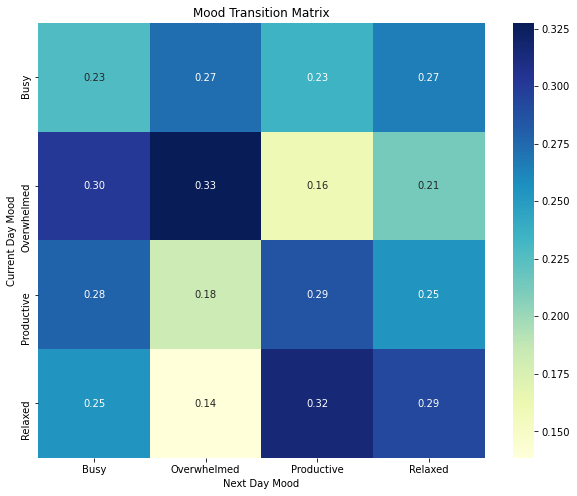

In [14]:
df_labeled['next_mood'] = df_labeled['mood'].shift(-1)
mood_transition_matrix = pd.crosstab(df_labeled['mood'], df_labeled['next_mood'], normalize='index')

plt.figure(figsize=(10, 8))
sns.heatmap(mood_transition_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Mood Transition Matrix')
plt.xlabel('Next Day Mood')
plt.ylabel('Current Day Mood')
plt.show()

The diagonal elements of the matrix show the probabilities of staying in the same mood from one day to the next. For instance, days categorized as 'Productive' have a 29% chance of being followed by another 'Productive' day. The matrix reveals patterns in mood shifts. For example, 'Overwhelmed' days tend to be followed by 'Productive' days with a probability of 33%, which could indicate a recovery or response mechanism to a previously stressful day. Certain transitions, such as from 'Relaxed' to 'Overwhelmed,' are less likely to occur, suggesting that days off or leisurely days do not commonly lead directly to overwhelming days. Some transitions appear symmetrical, such as from 'Busy' to 'Relaxed' and vice versa, both with a probability of around 25%. This could suggest a balance in the pace of activities from one day to the next.

The rest of the visualizations from the first pipeline were skipped in this report, since they will be reused with updated data for the second pipeline.

### 2- Data Cleaning, Pre-Processing, and Exploration in the Second Pipeline

### Overview of the Updates

In the first pipeline, one significant challenge was the limited data availability, which restricted the depth of analysis and model performance. With initial sentiments spread thinly across classes, the models struggled to distinguish between nuanced moods across four categories due to insufficient examples per class. Addressing this, the second pipeline emphasized data augmentation to bolster the dataset and refine predictive capabilities. Techniques such as subdividing events and days into smaller samples and employing generative AI for paraphrasing event descriptions were introduced to expand the dataset artificially. This approach aimed to amplify the data to approach the recommended threshold of 10^3 samples per class.

Additionally, based on the insightful feedback, the complexity of mood categories was reduced from 4 categories to a binary classification of "positive" and "negative," simplifying the target and focusing on a more robust signal in the data. Daily segments with events and non-events were treated as distinct input categories, revealing mood patterns tied to the presence or absence of scheduled activities. Days were dissected into smaller segments (3 daily segments), considering the "no event" periods as meaningful predictors of mood. This granular view allowed the inclusion of 'nothing' as a feature, providing a more holistic representation of daily experiences. This nuanced encoding helped to capture the entire spectrum of daily and segment-specific dynamics, including the influence of free time on mood.

Finally, the first pipeline only considered the numeric features of the dataset, losing valuable information that could significantly impact the mood predictions coming from qualitative features, such as event summaries and descriptions. In this pipeline, additional preprocessing, feature engineering, and cleaning steps were also followed to include textual data alongside numeric data to train a wide range of machine learning models that could give a more extended view of the patterns in the dataset. 

### Pre-Processing Step 1: Modifying the Events and Divide Events into Parts If Needed

The pre-processing of event data in the second pipeline has been designed to account for the daily flow of activities and their potential impact on mood. Recognizing that certain events may span across different segments of the day, it was imperative to modify the representation of these events in the dataset. This section outlines the process undertaken to chop up events into parts, ensuring each part falls within a designated daily segment, thereby refining the data for a segment-based aggregation.

In [15]:
# Libraries

from itertools import product

In [16]:
# Read the cleaned and pre-processed CSV file

df = pd.read_csv('/Users/mirayozcan/Desktop/events_cleaned_finalized.csv')
df.head()

,event_id,date,start_time,end_time,duration,n_attendees,description,summary
0,1,8/25/2021,7:15:00,7:30:00,15,2.0,Event Name: 15 Minute Meeting\n\nNeed to make ...,İsil and Miray Özcan
1,2,9/27/2021,23:00:00,0:00:00,60,1.0,Do you always feel like you're running out of ...,Time Management Lab
2,3,10/4/2021,16:00:00,19:30:00,210,1.0,NaN,SS50 AND CS50 CLASSES
3,4,10/5/2021,3:30:00,4:30:00,60,1.0,NaN,Relaxation Time
4,5,10/5/2021,14:45:00,15:00:00,15,1.0,NaN,Wake Up


In the initial dataset, events that were on the cusp of daily segments—defined by the start and end times including 00:00:00, 08:00:00, or 16:00:00—were manually adjusted to align perfectly within these segments. This manual preprocessing maintained the integrity of each event's core attributes (date, number of attendees, description, and summary) while adapting their timing to fit within the morning, daytime, or evening segments.

In [17]:
# Read the manually chopped events

df_chopped = pd.read_csv('/Users/mirayozcan/Desktop/events_chopped.csv')
print('The number of rows in this dataset is:', len(df_chopped))
df_chopped.head()

The number of rows in this dataset is: 1701


,event_id,date,start_time,end_time,duration,n_attendees,description,summary,is_within_segment,segment,start_hour,end_hour
0,1,8/25/2021,7:15:00,7:30:00,15,2.0,Join İsil and Miray Özcan for an interactive w...,İsil and Miray Özcan,True,morning,7,7
1,2,9/27/2021,23:00:00,0:00:00,60,1.0,Participate in a comprehensive Time Management...,Time Management Lab,True,evening,23,0
2,3,10/4/2021,16:00:00,19:30:00,210,1.0,Engage in both Social Science 50 and Computer ...,SS50 AND CS50 CLASSES,True,evening,16,19
3,4,10/5/2021,3:30:00,4:30:00,60,1.0,Indulge in a relaxation session to unwind and ...,Relaxation Time,True,morning,3,4
4,5,10/5/2021,14:45:00,15:00:00,15,1.0,Start your day energetically with a morning wa...,Wake Up,True,daytime,14,15


A critical verification step ensured that no events spanned across different segments post-manual processing. A function was created to check if an event's start and end times fell within the defined morning, daytime, or evening boundaries. The function returned a Boolean value for each event, verifying its correct placement within a segment.

In [18]:
# Verify that no events span across different day segments after manual preprocessing

def check_event_segment(row):
    # Adjust end time for comparison
    end_time = row['end_time'] if row['end_time'] != '00:00:00' else '24:00:00'
    
    # Convert start and end times to datetime objects for easier comparison
    start_dt = datetime.strptime(row['start_time'], '%H:%M:%S')
    end_dt = datetime.strptime(end_time, '%H:%M:%S')
    
    # Convert times to minutes since midnight
    start_min = start_dt.hour * 60 + start_dt.minute
    end_min = end_dt.hour * 60 + end_dt.minute
    
    # Define segment boundaries
    segments = {'morning': (0, 8 * 60), 'daytime': (8 * 60, 16 * 60), 'evening': (16 * 60, 24 * 60)}
    
    for segment, (start_bound, end_bound) in segments.items():
        if start_min >= start_bound and end_min <= end_bound:
            return True
    return False

# Apply the updated function
df_chopped['is_within_segment'] = df_chopped.apply(check_event_segment, axis=1)

# Identify events that span across different segments
events_outside_segments = df_chopped[df_chopped['is_within_segment'] == False]

# Display these events to review
if len(events_outside_segments) > 0:
    events_outside_segments
else:
    print("All events are modified according to day segments appropriately.")

All events are modified according to day segments appropriately.


To facilitate segment-based analysis, each event was labeled with the time of day it occurred—morning, daytime, or evening. A labeling function mapped the start time of each event to the corresponding segment. This was primarily for the purpose of assigning events to daily segments while refining the data for a segment-based aggregation.

In [19]:
# Label each event with its day segment

def label_event_segment(start_time):
    hour = int(start_time.split(':')[0])
    
    if 0 <= hour < 8:
        return 'morning'
    elif 8 <= hour < 16:
        return 'daytime'
    else:  # 16 <= hour < 24
        return 'evening'

# Apply the labeling function to the start_time column to create the segment labels
df_chopped['segment'] = df_chopped['start_time'].apply(label_event_segment)
print('The number of rows in this dataset is;', len(df_chopped))
df_chopped.head()

The number of rows in this dataset is; 1701


,event_id,date,start_time,end_time,duration,n_attendees,description,summary,is_within_segment,segment,start_hour,end_hour
0,1,8/25/2021,7:15:00,7:30:00,15,2.0,Join İsil and Miray Özcan for an interactive w...,İsil and Miray Özcan,True,morning,7,7
1,2,9/27/2021,23:00:00,0:00:00,60,1.0,Participate in a comprehensive Time Management...,Time Management Lab,True,evening,23,0
2,3,10/4/2021,16:00:00,19:30:00,210,1.0,Engage in both Social Science 50 and Computer ...,SS50 AND CS50 CLASSES,True,evening,16,19
3,4,10/5/2021,3:30:00,4:30:00,60,1.0,Indulge in a relaxation session to unwind and ...,Relaxation Time,True,morning,3,4
4,5,10/5/2021,14:45:00,15:00:00,15,1.0,Start your day energetically with a morning wa...,Wake Up,True,daytime,14,15


The segmentation of events laid the groundwork for segment-based daily aggregations, enabling a more granular analysis of daily patterns. With each event neatly fitting into a morning, daytime, or evening category, the dataset now provided a more refined foundation for exploring how different parts of the day impact mood.

In [20]:
df_chopped.to_csv('/Users/mirayozcan/Desktop/events_chopped.csv', index=False)

### Pre-Processing Step 2: Creating Daily Segment-Based Aggregation (Each Date Is Represented By 3 Parts)

For the second pre-processing step, the focus was on creating a daily segment-based aggregation of events. The intention behind this methodical process was to enrich the dataset by presenting each day in three instances, corresponding to morning, daytime, and evening segments. This expanded view facilitated a tri-fold increase in the dataset size and a more nuanced exploration of daily mood variations.

First, a comprehensive DataFrame of all possible date and segment combinations was established. By pairing each unique date with the three time segments of the day, a template was formed to accommodate the aggregation of events.

In [21]:
# Generate a DataFrame of all date and segment combinations

unique_dates = df_chopped['date'].drop_duplicates()
segments = ['morning', 'daytime', 'evening']
date_segment_combinations = pd.DataFrame(list(product(unique_dates, segments)), columns=['date', 'segment'])

The 'start_time' and 'end_time' columns were condensed to their hour component to align events with their respective segments more effectively. This transformation was pivotal for the subsequent aggregation step.

In [22]:
# Convert 'start_time' and 'end_time' to just the hour part before aggregation

df_chopped['start_hour'] = pd.to_datetime(df_chopped['start_time'], format='%H:%M:%S').dt.hour
df_chopped['end_hour'] = pd.to_datetime(df_chopped['end_time'], errors='coerce', format='%H:%M:%S').dt.hour
df_chopped['end_hour'] = df_chopped['end_hour'].fillna(24)  # Assuming '00:00:00' as end_time is considered as 24

With these transformations in place, events were aggregated based on the date and segment, creating a structured summary of activities within each daily segment.

In [23]:
# Aggregate existing events by date and segment with the adjusted hour extraction

aggregated_events = df_chopped.groupby(['date', 'segment']).agg({
    'event_id': lambda x: ', '.join(map(str, x)),
    'duration': ['sum', 'mean'],
    'n_attendees': ['size', 'sum', 'mean'],
    'start_hour': 'min',
    'end_hour': 'max',
}).reset_index()

# Adjust column naming to reflect the inclusion of start and end hours
aggregated_events.columns = ['date', 'segment', 'event_ids', 'total_duration', 'avg_duration', 
                             'n_events', 'total_attendees', 'avg_attendees', 
                             'start_first_event', 'end_last_event']

Following aggregation, the newly formed segment-based event summaries were merged back into the complete list of date and segment combinations. Missing values were addressed by assigning placeholders, ensuring consistency and maintaining data integrity.

In [24]:
# Proceed with merging, filling missing values, and adding day_of_month, day_of_week as before

daily_summary_chopped = pd.merge(date_segment_combinations, aggregated_events, on=['date', 'segment'], how='left')

daily_summary_chopped.fillna({
    'event_ids': 0, # numeric and distinguishable placeholder for missing values 
    'total_duration': 0,
    'avg_duration': 0,
    'n_events': 0,
    'total_attendees': 0,
    'avg_attendees': 0,
    'start_first_event': -1, # numeric and distinguishable placeholder for missing values 
    'end_last_event': -1 # same as above
}, inplace=True)

# Ensure 'date' column is of datetime type after merging and before extracting components
daily_summary_chopped['date'] = pd.to_datetime(daily_summary_chopped['date'])

Post-merging, the 'date' column underwent conversion to the datetime format to facilitate the extraction of 'day_of_month' and 'day_of_week', essential features for further analysis.

In [25]:
# Extract 'day_of_month' and 'day_of_week'

daily_summary_chopped['day_of_month'] = daily_summary_chopped['date'].dt.day
daily_summary_chopped['day_of_week'] = daily_summary_chopped['date'].dt.dayofweek + 1

# Rest of the preprocessing

daily_summary_chopped['segment'] = pd.Categorical(daily_summary_chopped['segment'], categories=['morning', 'daytime', 'evening'], ordered=True)
daily_summary_chopped.sort_values(by=['date', 'segment'], inplace=True)
daily_summary_chopped.reset_index(drop=True, inplace=True)

A new column 'has_event' was introduced to denote the presence or absence of events within each segment, while categorical values within the 'segment' column were encoded into numeric representations to prepare the data for machine learning algorithms.

In [26]:
# Add a new column 'has_event' that is 1 if there's at least one event in the segment and 0 otherwise

daily_summary_chopped['has_event'] = (daily_summary_chopped['n_events'] > 0).astype(int)
daily_summary_chopped[['date', 'segment', 'event_ids', 'has_event']].head()

,date,segment,event_ids,has_event
0,2021-06-29,morning,0,0
1,2021-06-29,daytime,0,0
2,2021-06-29,evening,325,1
3,2021-07-23,morning,0,0
4,2021-07-23,daytime,0,0


In [27]:
# Encode categorical variables like "morning," "daytime," and "evening" into numeric values 
# as a common practice in preparing data for machine learning algorithms.

# Map segments to ordinal values: morning=0, daytime=1, evening=2

segment_mapping = {
    'morning': 0,
    'daytime': 1,
    'evening': 2
}

# Apply the mapping to the 'segment' column
daily_summary_chopped['segment_numeric'] = daily_summary_chopped['segment'].map(segment_mapping)
daily_summary_chopped[['date', 'segment', 'segment_numeric']].head()

,date,segment,segment_numeric
0,2021-06-29,morning,0
1,2021-06-29,daytime,1
2,2021-06-29,evening,2
3,2021-07-23,morning,0
4,2021-07-23,daytime,1


This thorough segment-based expansion of the dataset set the stage for a detailed mood pattern analysis. The data now reflected a clearer picture of how different times of the day could potentially influence mood swings.

In [28]:
daily_summary_chopped.to_csv('/Users/mirayozcan/Desktop/daily_summary_chopped.csv', index=False)

### Pre-Processing Step 3: Labeling the Updated Daily Segment-Based Dataset

A significant modification in this phase of pre-processing was the transition from a multi-class to a binary classification system. The initial four mood categories were reorganized into two principal groups to amplify the sample size for each category, thereby enhancing the robustness of the subsequent machine learning models.

The categories were consolidated as follows:
1. **Negative:** A combination of the previous 'Overwhelmed' and 'Busy' labels. This category encompasses days marked by excessive demands or packed schedules, potentially leading to stress or negative feelings.<br><br>

2. **Positive:**  Uniting the former 'Relaxed' and 'Productive' labels. Days classified under this umbrella typically balance leisure and productivity, contributing to a positive outlook.

The dataset, now segmented by day parts, required relabeling to reflect this binary scheme. The reclassification aimed to align with the improved data strategy suggested by feedback, ensuring each mood state was supported by a sufficient number of samples.

In [29]:
# Re-importing the labeled dataset

daily_summary_chopped_labeled = pd.read_csv('/Users/mirayozcan/Desktop/daily_summary_chopped_labeled.csv')
daily_summary_chopped_labeled.head()

,date,segment,event_ids,total_duration,avg_duration,n_events,total_attendees,avg_attendees,start_first_event,end_last_event,day_of_month,day_of_week,has_event,segment_numeric,mood
0,6/29/2021,morning,0,0,0.0,0,0,0.0,-1,-1,29,2,0,0,Positive
1,6/29/2021,daytime,0,0,0.0,0,0,0.0,-1,-1,29,2,0,1,Positive
2,6/29/2021,evening,325,15,15.0,1,2,2.0,20,20,29,2,1,2,Positive
3,7/23/2021,morning,0,0,0.0,0,0,0.0,-1,-1,23,5,0,0,Positive
4,7/23/2021,daytime,0,0,0.0,0,0,0.0,-1,-1,23,5,0,1,Positive


By simplifying the mood categories, the dataset not only becomes more manageable but also allows for more straightforward interpretations of the results from predictive modeling. This binary classification lays the groundwork for a focus on discerning between broadly positive and negative days, which could be particularly useful for applications aimed at general mood improvement strategies.

### Pre-Processing Step 4: Incorporating Textual Data from the Event Descriptions

In the quest to harness the full potential of the dataset, the decision was made to enrich the dataset with descriptive textual data derived from event summaries. This step was crucial as textual data often hold intricate nuances that can significantly influence classification outcomes.

1. **Filling Missing Descriptions:** To mitigate the lack of descriptions, a generative language model (ChatGPT-4) was employed. For events missing descriptions, new ones were generated, leveraging the succinct summaries as a seed to ensure relevance and context.<br><br>

2. **Paraphrasing for Uniformity:** Consistency in the language used across descriptions was attained through paraphrasing. This harmonization aimed to reduce non-informative variance, thus providing the model with a coherent language style and potentially equal sequence lengths.<br><br>

3. **Ensuring Descriptive Coverage:** The end goal was to guarantee that every event in the dataset possessed a description, thereby maximizing the textual information available for model training.

A batch of event titles was fed into ChatGPT-4 with a prompt tailored to generate informative and concise descriptions, approximately 15 words in length. This approach not only addressed the absence of descriptions but also revitalized existing ones for uniformity and richness.

**Sample GPT-4 Prompt for Textual Data Generation:** Given the existing summaries (titles) of my personal calendar data for the 10 data points pasted below, can you generate informative descriptions of the events by utilizing their summaries? The updated descriptions should be approximately 15 words long and appropriate for training purposes for machine learning models, specifically for text-data-based classification tasks. When you have the updated descriptions, please prepare them in a format that enables me to copy your response and paste them into the "description" column of the associated data points. Although the summary might be the same for each event, strive for a unique description to increase variability in the training data. However, when this is not possible, two events with the exact same summaries could also have the same description. 

In [30]:
# Importing the enhanced dataset with new event descriptions
df_chopped_enhanced = pd.read_csv('/Users/mirayozcan/Desktop/events_chopped_enhanced.csv')

# Display the first few rows to verify the updated descriptions
df_chopped_enhanced.head()

,event_id,date,start_time,end_time,duration,n_attendees,description,summary,is_within_segment,segment,start_hour,end_hour
0,1.0,8/25/2021,7:15:00,7:30:00,15.0,2.0,Join İsil and Miray Özcan for an interactive w...,İsil and Miray Özcan,True,morning,7.0,7.0
1,2.0,9/27/2021,23:00:00,0:00:00,60.0,1.0,Participate in a comprehensive Time Management...,Time Management Lab,True,evening,23.0,0.0
2,3.0,10/4/2021,16:00:00,19:30:00,210.0,1.0,Engage in both Social Science 50 and Computer ...,SS50 AND CS50 CLASSES,True,evening,16.0,19.0
3,4.0,10/5/2021,3:30:00,4:30:00,60.0,1.0,Indulge in a relaxation session to unwind and ...,Relaxation Time,True,morning,3.0,4.0
4,5.0,10/5/2021,14:45:00,15:00:00,15.0,1.0,Start your day energetically with a morning wa...,Wake Up,True,daytime,14.0,15.0


This process was not only about filling gaps in the dataset but also about enriching the data's quality to serve as a solid foundation for the models to learn more effectively from the textual nuances. It represented a blend of automated AI capabilities and strategic data preparation, tailored for advanced machine learning applications.

### Pre-Processing Step 5: Enhancing the Daily Segment-Based Dataset with Event Descriptions

The aim of this preprocessing step is to amalgamate the descriptive textual content into the day segment-based aggregation. By doing so, we elevate the dataset's ability to convey not just the quantitative but also the qualitative nuances of daily schedules.

1. **Empty Descriptions:** For segments without events (has_event = 0), the absence of activity is explicitly stated with "No event descriptions." This clear demarcation ensures that the model recognizes segments of inactivity.<br><br>

2. **Populated Descriptions:** For segments with events (has_event = 1), descriptions from events_chopped_enhanced are collated to represent the day's narrative. This methodical gathering of text paints a richer picture of the segment's characteristics.

In [31]:
# Loading the datasets

events_chopped_enhanced = pd.read_csv('/Users/mirayozcan/Desktop/events_chopped_enhanced.csv')
daily_summary_chopped_labeled = pd.read_csv('/Users/mirayozcan/Desktop/daily_summary_chopped_labeled.csv')

# Creating a dictionary to map event IDs to their descriptions
event_description_mapping = dict(zip(events_chopped_enhanced.event_id, events_chopped_enhanced.description))

# Defining a function to concatenate event descriptions for each day segment
def get_event_descriptions(row, event_description_mapping):
    if row['has_event'] == 1:
        event_ids = [int(e) for e in str(row['event_ids']).split(',')]
        descriptions = [event_description_mapping.get(event_id, 'No description available.') for event_id in event_ids]
        return ' '.join(descriptions)
    else:
        return 'No event descriptions.'

# Applying the function to compile descriptions for the daily segments
daily_summary_chopped_labeled['events_descriptions'] = daily_summary_chopped_labeled.apply(
    lambda row: get_event_descriptions(row, event_description_mapping), axis=1
)

# Verifying the process by displaying the head of the dataframe
daily_summary_chopped_labeled[['date', 'segment', 'events_descriptions']].head()

,date,segment,events_descriptions
0,6/29/2021,morning,No event descriptions.
1,6/29/2021,daytime,No event descriptions.
2,6/29/2021,evening,Engage in activities with Cecile S for collabo...
3,7/23/2021,morning,No event descriptions.
4,7/23/2021,daytime,No event descriptions.


This approach of textual data enhancement is not only about appending strings but introducing context and substance that can dramatically influence model training. Textual descriptions offer an insight that could be pivotal in discerning the nature of the day and thus, the mood associated with it.

The output is a finely curated dataset where each day segment is characterized by a descriptive account of the activities or the notable lack thereof. This dataset is now prepped for models that can integrate and interpret both numerical and textual data to predict outcomes with greater depth and accuracy.

In [32]:
# Full visualization

daily_summary_chopped_labeled.head()

,date,segment,event_ids,total_duration,avg_duration,n_events,total_attendees,avg_attendees,start_first_event,end_last_event,day_of_month,day_of_week,has_event,segment_numeric,mood,events_descriptions
0,6/29/2021,morning,0,0,0.0,0,0,0.0,-1,-1,29,2,0,0,Positive,No event descriptions.
1,6/29/2021,daytime,0,0,0.0,0,0,0.0,-1,-1,29,2,0,1,Positive,No event descriptions.
2,6/29/2021,evening,325,15,15.0,1,2,2.0,20,20,29,2,1,2,Positive,Engage in activities with Cecile S for collabo...
3,7/23/2021,morning,0,0,0.0,0,0,0.0,-1,-1,23,5,0,0,Positive,No event descriptions.
4,7/23/2021,daytime,0,0,0.0,0,0,0.0,-1,-1,23,5,0,1,Positive,No event descriptions.


As a recap, here is a glossary for column name descriptions in the final version of our dataset:

- `date`: The date when the events took place. Data type: `Date`.
- `segment`: A part of the day categorized as morning, daytime, or evening. Data type: `String`.
- `event_ids`: Comma-separated IDs of events that occurred within a segment. Data type: `String`.
- `total_duration`: The sum of the durations (in minutes) of all events in a segment. Data type: `Integer`.
- `avg_duration`: The average duration (in minutes) of events in a segment. Data type: `Float`.
- `n_events`: The total number of events within a segment. Data type: `Integer`.
- `total_attendees`: The total number of attendees for all events in a segment. Data type: `Integer`.
- `avg_attendees`: The average number of attendees per event in a segment. Data type: `Float`.
- `start_first_event`: The starting hour of the first event in a segment (if any), `-1` indicates no event. Data type: `Integer`.
- `end_last_event`: The ending hour of the last event in a segment (if any), `-1` indicates no event. Data type: `Integer`.
- `day_of_month`: The day of the month extracted from the `date`. Data type: `Integer`.
- `day_of_week`: The day of the week extracted from the `date`, where `1` is Monday and `7` is Sunday. Data type: `Integer`.
- `has_event`: Indicator of whether at least one event occurred in a segment (`1` for yes, `0` for no). Data type: `Integer`.
- `segment_numeric`: Numerical encoding of the day segment (`0` for morning, `1` for daytime, `2` for evening). Data type: `Integer`.
- `mood`: The mood label for the segment, categorized as Positive or Negative. Data type: `String`.
- `events_descriptions`: Descriptions of events during the segment, or "No event descriptions." when empty. Data type: `String`.

In [33]:
# Saving the updated dataset with event descriptions to a CSV file
daily_summary_chopped_labeled.to_csv('/Users/mirayozcan/Desktop/daily_summary_chopped_labeled_enhanced.csv', index=False)

### Further Cleaning and Pre-Processing on Textual Data (event_descriptions Column) for Model Preparation

The textual data within the `event_descriptions` column of our dataset holds a wealth of information that can significantly influence the performance of machine learning models. However, this raw textual data often contains noise – such as special characters, numbers, and common words – that can obscure the meaningful patterns models might learn from. Therefore, further cleaning and preprocessing of this textual data is crucial to prepare it effectively for model training.

To enhance the quality of the textual data and ensure consistency across the dataset, the following preprocessing steps were employed:

- **Placeholder Removal**: It was identified that "No event descriptions." serves as a placeholder text for events without descriptions. Since this does not provide meaningful information for modeling, it's treated as noise and removed.<br><br>

- **Case Normalization**: Text is converted to lowercase to ensure that the same words in different cases are treated as identical tokens. This step helps in reducing the complexity of the data.<br><br>

- **Punctuation and Special Characters Removal**: Punctuation, special characters, and numbers were removed as these elements are typically not useful for text representation learning and are considered noise.<br><br>

- **Tokenization**: The process of breaking text into individual words or tokens is essential since machine learning models operate on numerical data. Tokenization serves as the first step in transforming text into a format that models can understand.<br><br>

- **Stopwords Removal**: Common words like "and", "is", "in", etc., which usually don't carry significant meaning, were removed. This helps in reducing the feature space size, allowing models to focus on more informative aspects of the text.<br><br>

- **Stemming/Lemmatization**: This step involves reducing words to their root form. For instance, "running" and "runs" would both be reduced to "run". It helps in consolidating different forms of the same word, thus simplifying the feature space and aiding the model's generalization capability.

In [34]:
# Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [35]:
# Dataset

df = pd.read_csv('/Users/mirayozcan/Desktop/daily_summary_chopped_labeled_enhanced.csv')

# Function to preprocess text data

def preprocess_text(text):
    if text == "No event descriptions.":
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if not word in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return " ".join(stemmed_tokens)

# Applying preprocessing
df['events_descriptions_processed'] = df['events_descriptions'].apply(preprocess_text)

# Displaying preprocessed text
df[['events_descriptions', 'events_descriptions_processed']]

,events_descriptions,events_descriptions_processed
0,No event descriptions.,
1,No event descriptions.,
2,Engage in activities with Cecile S for collabo...,engag activ cecil collabor effort
3,No event descriptions.,
4,No event descriptions.,
...,...,...
1519,No event descriptions.,
1520,Participate in introspective Q&A session on jo...,particip introspect qa session job readi strat...
1521,No event descriptions.,
1522,No event descriptions.,


In [36]:
df.to_csv('/Users/mirayozcan/Desktop/daily_summary_chopped_labeled_enhanced.csv', index=False)

### Exploratory Analysis on the Second Pipeline Data

#### 1- Numerical Data Exploration

#### Histograms and Descriptive Statistics

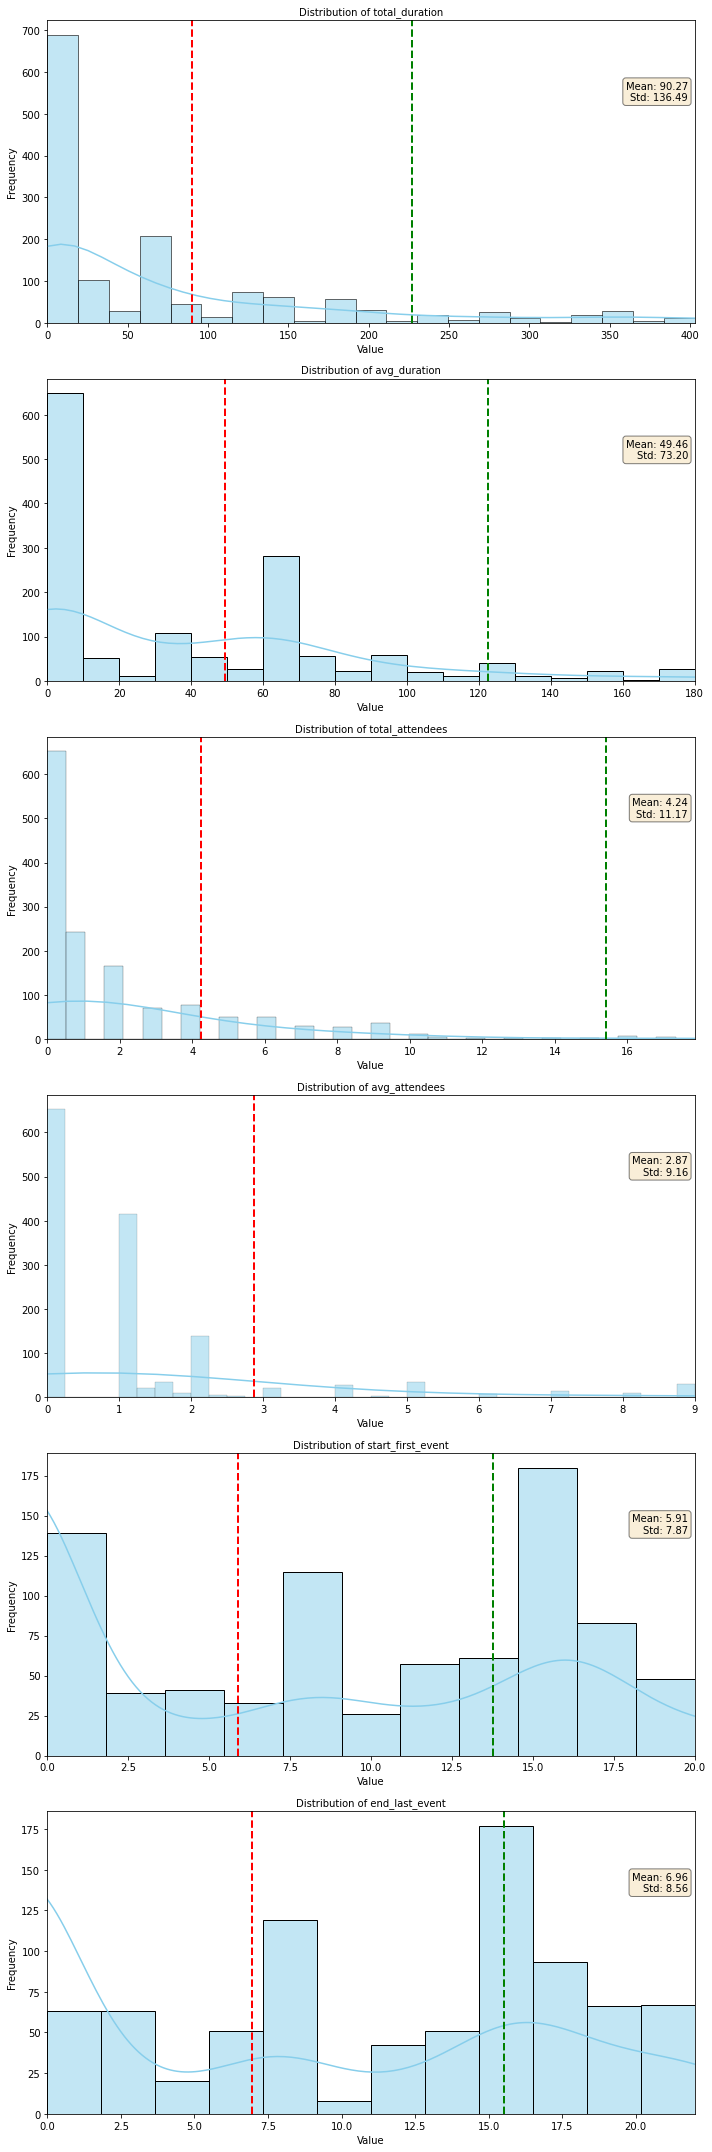

In [37]:
# Updated list of continuous variable names

continuous_vars = [
    'total_duration', 'avg_duration',
    'total_attendees', 'avg_attendees', 'start_first_event',
    'end_last_event']

# Plot updated histograms for each continuous variable
fig, axes = plt.subplots(len(continuous_vars), 1, figsize=(10, 5 * len(continuous_vars)))

for i, var in enumerate(continuous_vars):
    # Determine the 95th percentile for the current variable
    percentile_95 = np.percentile(daily_summary_chopped_labeled[var].dropna(), 95)
    
    sns.histplot(data=daily_summary_chopped_labeled, x=var, kde=True, ax=axes[i], color='skyblue', edgecolor='black', binrange=(0, percentile_95))
    axes[i].set_title(f'Distribution of {var}', fontsize=10)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Value')
    axes[i].set_xlim(left=0, right=percentile_95)  # Set the x-axis limit to the 95th percentile
    
    # Calculate mean and standard deviation
    mean_val = daily_summary_chopped_labeled[var].mean()
    std_val = daily_summary_chopped_labeled[var].std()

    # Plot the mean line
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
    # Plot the standard deviation lines (mean +/- std)
    axes[i].axvline(mean_val + std_val, color='green', linestyle='dashed', linewidth=2)
    axes[i].axvline(mean_val - std_val, color='green', linestyle='dashed', linewidth=2)

    # Print mean and standard deviation
    axes[i].text(0.99, 0.8, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}', transform=axes[i].transAxes,
            verticalalignment='top', horizontalalignment='right', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

1. **Total Duration of Events**: This histogram shows the distribution of the total duration of events within each day segment. The mean duration is around 90 minutes, but the significant standard deviation suggests a broad range of activity levels, from quick tasks to extended engagements.<br><br>

2. **Average Duration of Events**: The average duration per event is visualized here, indicating that most events tend to be brief. A mean around 49 minutes and a wide spread reflect diverse event lengths, from short meetings to lengthy workshops or social gatherings.<br><br>

3. **Total Number of Attendees**: This histogram depicts the total number of attendees per segment. A lower mean suggests that segments often include smaller, perhaps more focused or personal events. The spread points to occasional larger gatherings that significantly deviate from the norm.<br><br>

4. **Average Number of Attendees**: Focusing on the average number of attendees per event, this histogram illustrates a tendency towards intimate settings, with most events hosting fewer individuals. The standard deviation, however, hints at the sporadic presence of more populous events.<br><br>

5. **Start Time of First Event**: The distribution of when the first event of the day starts reveals a concentration in the earlier hours. The average start time indicates that days often begin by mid-morning, yet there’s enough variation to account for early risers or late starters.<br><br>

6. **End Time of Last Event**: Examining the end time of the last event, this histogram shows most days conclude by early evening. The mean end time reflects a typical end-of-workday pattern, though the spread includes days that stretch into the night, indicating flexible end times.

#### Heatmap of Average Event Counts Across Day Segments and Start Times

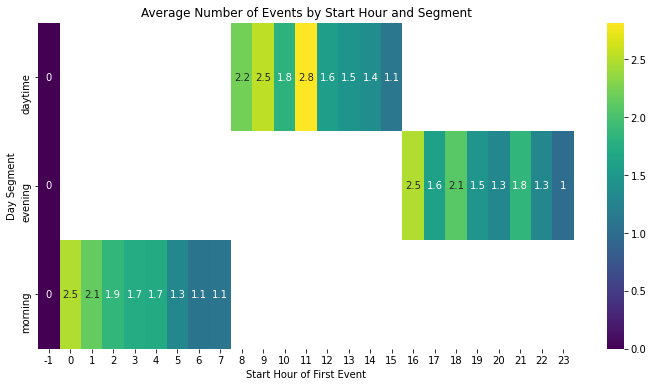

In [38]:
# Create a pivot table with hours and segments as dimensions
hourly_pivot = daily_summary_chopped_labeled.pivot_table(
    index='segment', 
    columns='start_first_event', 
    values='n_events', 
    aggfunc='mean'
)

# Create a heatmap of the average number of events
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_pivot, annot=True, cmap='viridis')
plt.title('Average Number of Events by Start Hour and Segment')
plt.xlabel('Start Hour of First Event')
plt.ylabel('Day Segment')
plt.show()

The heatmap provides a visualization of the average number of events that start at various hours throughout the day, broken down by day segment (morning, daytime, evening). Each cell's color intensity reflects the average event count for that time segment, with warmer colors representing higher averages. In this representation, it appears that the daytime segment tends to have a higher average number of events starting around mid-morning to early afternoon. Contrastingly, the morning and evening segments show a wider distribution of start times, indicating more variability in when events begin. Notably, there is an absence of events starting at certain hours during the day, which is represented by the darker cells (e.g., no events that start at hour 0 for daytime and evening segments).

#### Comparative Mood Distribution Across Different Day Segments

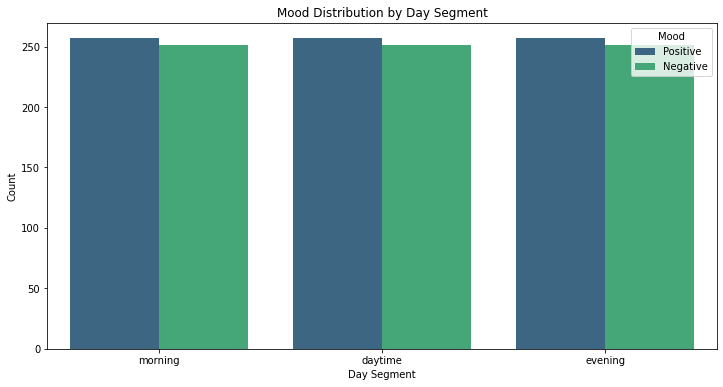

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=daily_summary_chopped_labeled, x='segment', hue='mood', palette='viridis')
plt.title('Mood Distribution by Day Segment')
plt.xlabel('Day Segment')
plt.ylabel('Count')
plt.legend(title='Mood')
plt.show()

This bar chart illustrates the distribution of mood states—positive and negative—across three different segments of the day: morning, daytime, and evening. Each segment's bar is bifurcated into two colors representing the count of positive (dark blue) and negative (green) moods recorded. The nearly equal height of bars across all segments suggests a uniform distribution of mood states throughout the day. Interestingly, there is a slightly higher occurrence of positive moods during the evening segment, which could suggest that people tend to end their day on a more positive note or feel a sense of relief as the day concludes. In contrast, the morning and daytime segments show a very close count of positive and negative moods, indicating a balanced emotional state during earlier parts of the day.

#### Daily Mood Trends Across the Week

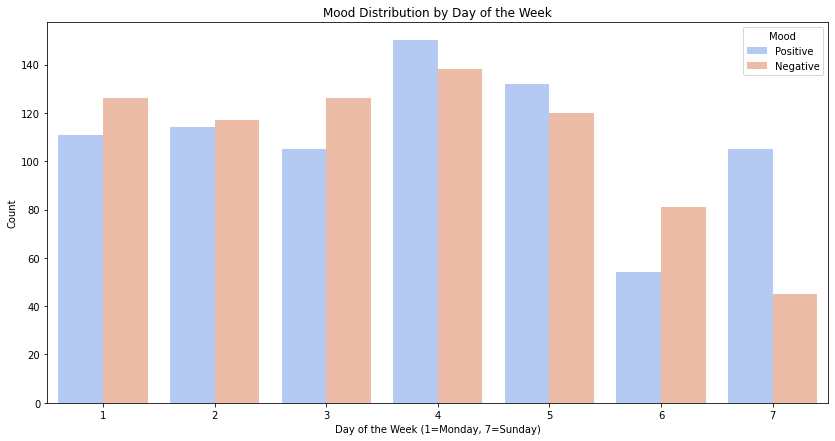

In [40]:
plt.figure(figsize=(14, 7))
sns.countplot(data=daily_summary_chopped_labeled, x='day_of_week', hue='mood', palette='coolwarm', dodge=True)
plt.title('Mood Distribution by Day of the Week')
plt.xlabel('Day of the Week (1=Monday, 7=Sunday)')
plt.ylabel('Count')
plt.legend(title='Mood', loc='upper right')
plt.show()

This chart presents the mood distribution across day segments throughout the week. Each day is marked from 1 (Monday) to 7 (Sunday), displaying the count of positive (blue) and negative (salmon) moods recorded. The mid-week days show a higher prevalence of positive moods, possibly reflecting midweek productivity or routine stability. In contrast, the weekends, particularly Sunday, exhibit a surge in negative moods, which could suggest end-of-weekend blues or anticipation of the upcoming week.

#### Segment-to-Segment Mood Stability Heatmap

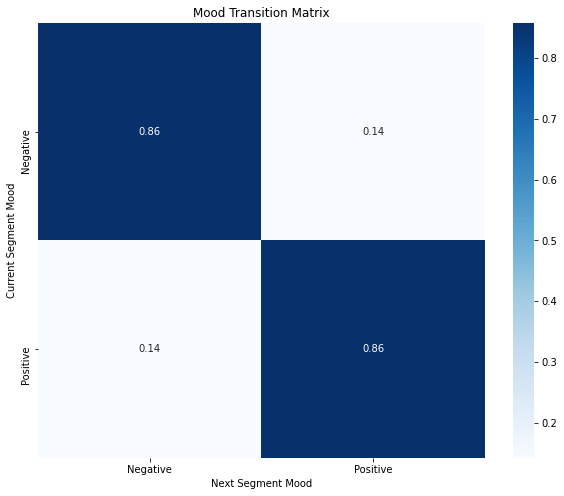

In [41]:
# Create a new DataFrame that shifts the mood column
# Assuming each row in daily_summary_chopped_labeled is a day segment ordered chronologically
daily_summary_chopped_labeled['next_mood'] = daily_summary_chopped_labeled.groupby(['date'])['mood'].shift(-1)

# For evening segments, next_mood should be the mood of the following morning
# This assumes that the data is sorted by date and segment
is_evening = daily_summary_chopped_labeled['segment'] == 'evening'
following_morning = daily_summary_chopped_labeled['segment'].shift(-1) == 'morning'
next_day = daily_summary_chopped_labeled['date'] != daily_summary_chopped_labeled['date'].shift(-1)

# Where it's an evening segment and the following row is a morning of a next day, 
# shift the mood from the following row
daily_summary_chopped_labeled.loc[is_evening & following_morning & next_day, 'next_mood'] = daily_summary_chopped_labeled['mood'].shift(-1)

# Drop the rows where next_mood is NaN, which will be the last segment of the dataset
daily_summary_chopped_labeled.dropna(subset=['next_mood'], inplace=True)

# Calculate the mood transition matrix
mood_transition_matrix = pd.crosstab(daily_summary_chopped_labeled['mood'], 
                                     daily_summary_chopped_labeled['next_mood'], 
                                     normalize='index')

# Plotting the mood transition matrix
plt.figure(figsize=(10, 8))
sns.heatmap(mood_transition_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title('Mood Transition Matrix')
plt.xlabel('Next Segment Mood')
plt.ylabel('Current Segment Mood')
plt.show()

The heatmap visualizes the stability of mood from one segment to the next within a day. High values along the diagonal indicate a tendency for moods to persist; with both negative and positive states showing about 86% continuity. This suggests a strong mood inertia, where the current emotional state is likely to remain the same in the subsequent segment. Transitioning from a negative to a positive mood or vice versa is less common, reflecting the resilience of mood states against rapid shifts within the day's structure.

#### Total Duration of Activities and Mood Correlation by Day Segment

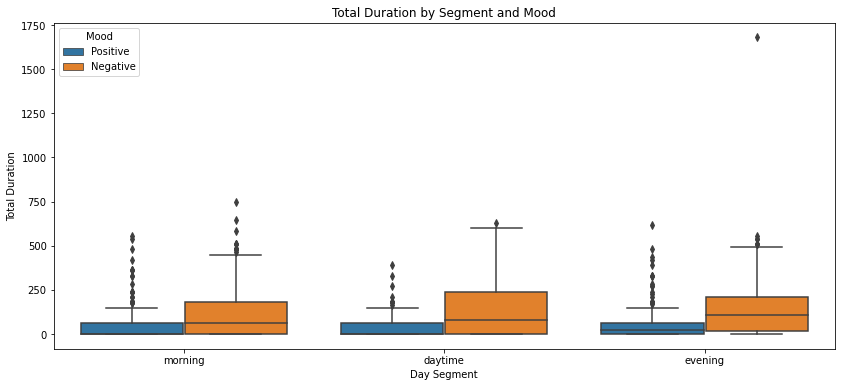

In [42]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=daily_summary_chopped_labeled, x='segment', y='total_duration', hue='mood')
plt.title('Total Duration by Segment and Mood')
plt.xlabel('Day Segment')
plt.ylabel('Total Duration')
plt.legend(title='Mood')
plt.show()

This boxplot analysis indicates that the total duration of activities doesn't significantly differentiate moods within morning and evening segments, suggesting these periods have a balanced mixture of positive and negative moods regardless of activity length. However, during the daytime, there's a noticeable variation in activity duration between moods, with negative moods associated with longer activity durations. This might imply that busier midday schedules could contribute to a negative mood, or conversely, that a negative mood perceives or results in the day feeling more loaded.

#### Comparative Mood Analysis Across Event Features

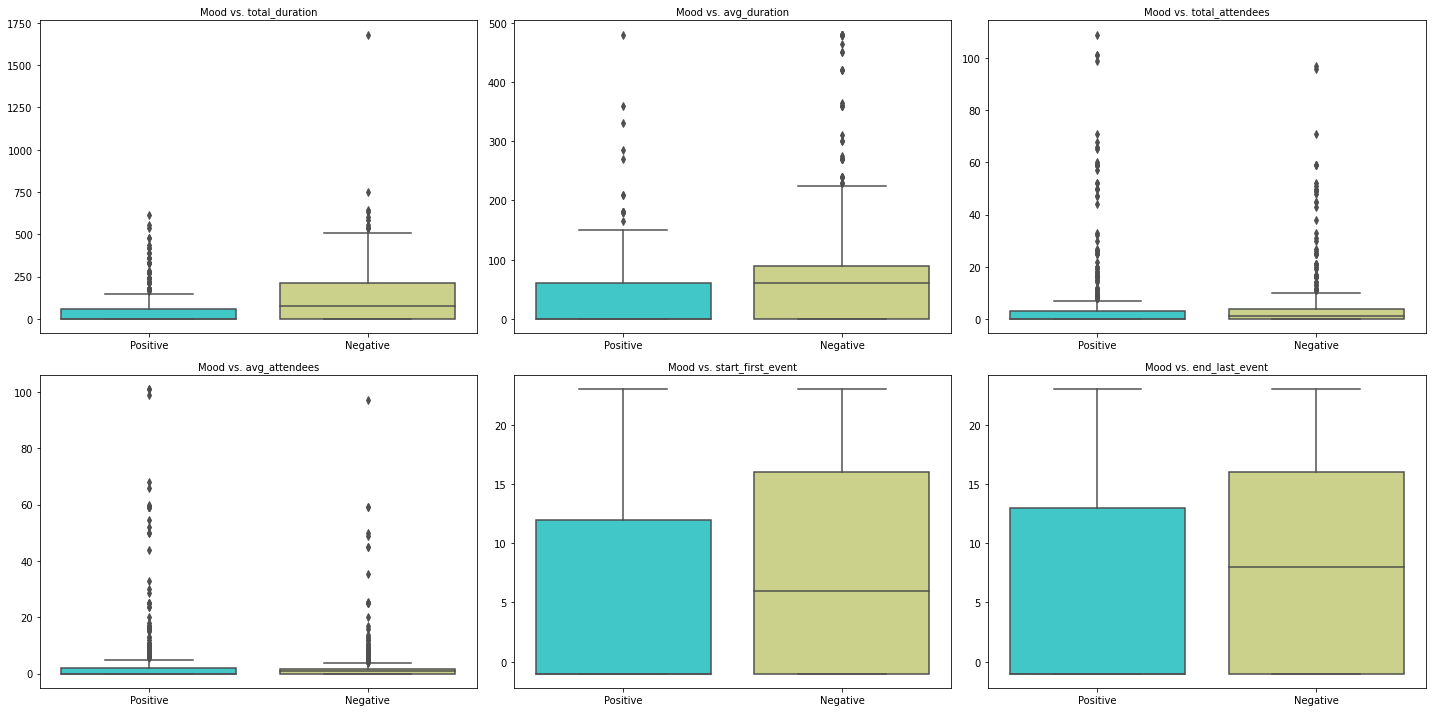

In [43]:
# Adjusting the subplot grid to accommodate the number of continuous columns
n_rows = (len(continuous_vars) + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5*n_rows))  # Adjust figsize accordingly
axes = axes.flatten()

# Loop through each continuous column to create boxplots
for ax, column in zip(axes, continuous_vars):
    sns.boxplot(x='mood', y=column, data=daily_summary_chopped_labeled, ax=ax, palette='rainbow')
    ax.set_title(f'Mood vs. {column}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

This set of boxplots provides an insightful comparison across various event features segmented by mood. The ‘total_duration’ feature shows a wider range for negative moods, suggesting a possible link between longer event durations and more negative mood assessments. For ‘avg_duration’ and ‘total_attendees’, both moods display similar medians, indicating that these factors may not be as influential on mood. However, the starting and ending times of events ('start_first_event' and 'end_last_event') present noticeable differences; negative moods are linked with earlier starts and later ends, hinting at a potential preference for more free time during mornings and evenings for a positive mood. 

#### Weekly Dynamics: Segment Impact on Total Duration

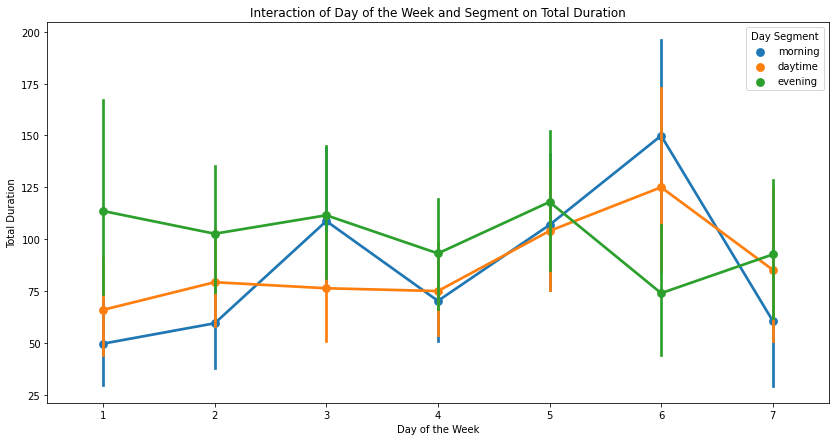

In [44]:
plt.figure(figsize=(14, 7))
sns.pointplot(data=daily_summary_chopped_labeled, x='day_of_week', y='total_duration', hue='segment')
plt.title('Interaction of Day of the Week and Segment on Total Duration')
plt.xlabel('Day of the Week')
plt.ylabel('Total Duration')
plt.legend(title='Day Segment')
plt.show()

This point plot reveals the dynamic interplay between day segments and total event duration throughout the week. Morning durations remain relatively consistent, suggesting a stable start to the day, while daytime and evening durations fluctuate more notably. Midweek spikes in daytime duration may reflect peak productivity or scheduled commitments, with a sharp increase in evening durations towards the weekend, potentially indicating social or leisure activities. Interestingly, the end-of-week drop in daytime durations could signify a collective winding down, transitioning into quieter evenings.

####  Correlation and Pairwise Relationships Amongst Event Characteristics

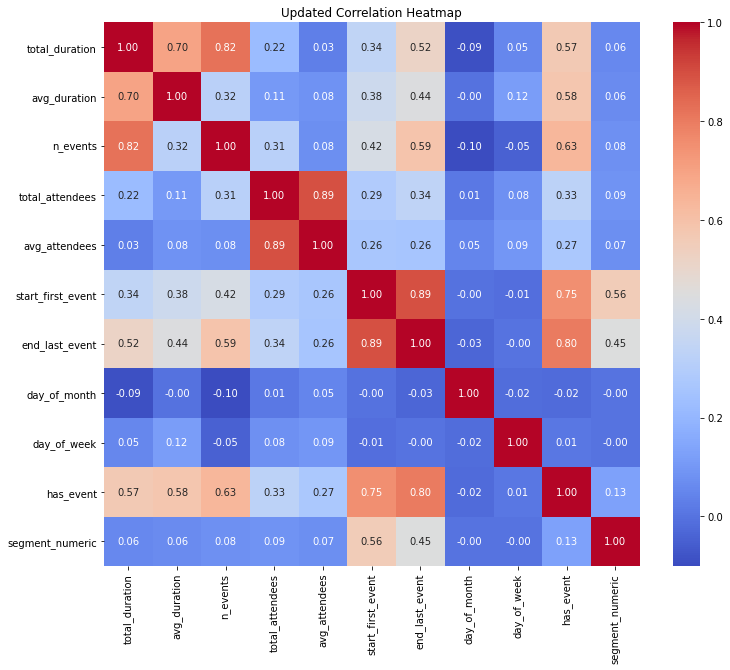

In [45]:
# Including the segment_numeric in the correlation analysis

numeric_vars = [
    'total_duration', 'avg_duration', 'n_events', 
    'total_attendees', 'avg_attendees', 'start_first_event', 
    'end_last_event', 'day_of_month', 'day_of_week', 'has_event', 
    'segment_numeric'
]

corr_vars = daily_summary_chopped_labeled[numeric_vars]
corr_matrix = corr_vars.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Updated Correlation Heatmap')
plt.show()

The heatmap visualizes the strength of correlation between various daily activity metrics. Notable is the strong positive relationship between total duration, average duration, and number of events, indicating that more events generally lead to longer days. A similar strong positive correlation between the start and end times of events suggests a consistent daily routine. Attendee metrics display a weaker correlation with other variables, implying that the number of people at events does not significantly dictate the day's structure. Interestingly, the day of the month and the week show negligible influence on daily activities, emphasizing a consistent daily rhythm regardless of the time within the month or week. The presence of events ('has_event') is moderately linked with higher event counts and durations, highlighting that active segments are distinctly busier.

#### Pairplot of Numeric Continuous Variables

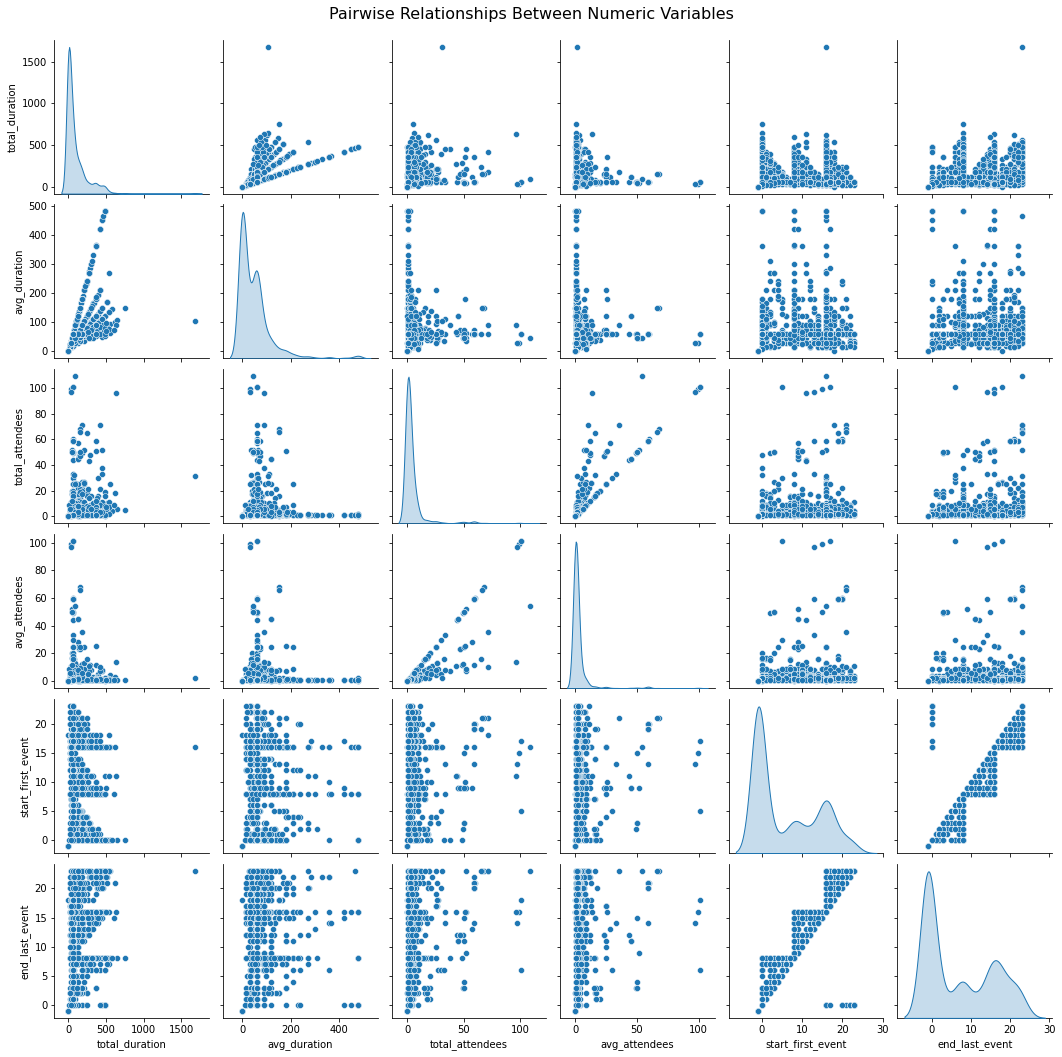

In [46]:
# Generate the pairplot
sns.pairplot(daily_summary_chopped_labeled[continuous_vars], diag_kind='kde')

# Adjust the height of each subplot
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairwise Relationships Between Numeric Variables', fontsize=16)
plt.show()

The scatterplot matrix presents a web of relationships between daily event variables. Diagonal plots show distribution densities, highlighting that total durations, event counts, and attendee numbers typically stay low, with fewer instances of higher values. Off-diagonal plots reveal clear positive correlations, especially between the number of events and total duration, signifying that more events usually extend the day's schedule. Start and end times of events are strongly linear, suggesting a consistent event timeline from day to day. The scatter among attendee-related variables suggests variability in meeting sizes, independent of the day's structure. Sparse points in upper regions indicate outlier days with unusual activity, either in duration or attendee count.

#### 2- Textual Data Exploration

#### Word Cloud of Event Descriptions

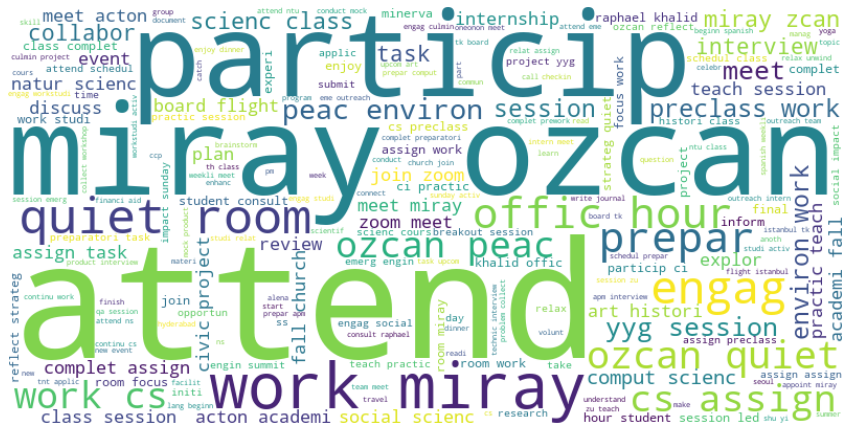

In [47]:
from wordcloud import WordCloud

# Combine all preprocessed descriptions into one large string
corpus = ' '.join(df['events_descriptions_processed'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud presents a visual summary of the most prevalent terms within the event descriptions, with larger font sizes indicating higher frequencies. Dominant terms like "assign," "work," "office," and "class" suggest a focus on professional and academic tasks. The prominence of words like "quiet," "peace," and "room" may imply a preference for tranquil, reflective, or individual activities. The visualization showcases recurring themes and priorities.

#### Frequency Analysis of Top Words in Event Descriptions

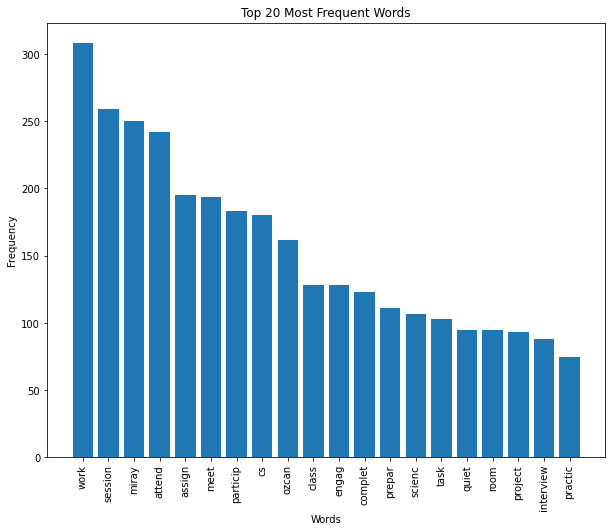

In [48]:
from collections import Counter

# Combine all reviews into one corpus
corpus = ' '.join(df['events_descriptions_processed'])

# Tokenize the corpus
tokens = corpus.split()

# Create a frequency distribution
freq_dist = Counter(tokens)

# Convert to DataFrame for easier plotting
freq_df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency']).sort_values(by="Frequency", ascending=False)

# Select top 20 words
top_words = freq_df.head(20)

# Plot the frequencies
plt.figure(figsize=(10, 8))
plt.bar(top_words['Word'], top_words['Frequency'])
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()

The bar chart showcases the most common words across the event descriptions, revealing a high occurrence of terms like "work," "session," "Miray," and "attend." The data indicates a significant emphasis on work-related activities and participation in sessions or meetings. The presence of a personal name suggests individual assignments or personalized tasks. This frequency analysis helps identify key areas of focus and recurring activities, providing insights into my professional and personal priorities as reflected in my event description data.

#### Bi-gram Frequency Analysis in Event Descriptions

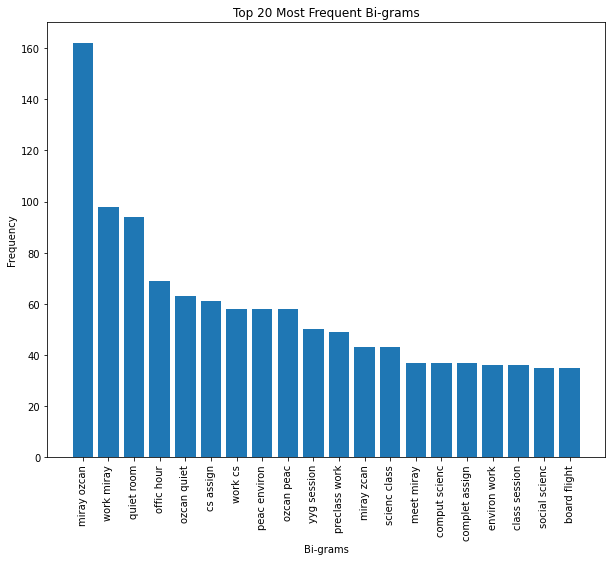

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a bi-gram count vectorizer
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=1000)
bigram_matrix = bigram_vectorizer.fit_transform(df['events_descriptions_processed'])

# Get feature names and sum up feature count
bigram_counts = bigram_matrix.sum(axis=0).A1
bigram_features = bigram_vectorizer.get_feature_names_out()  # Updated method call
bigram_freq_df = pd.DataFrame({'Bi-gram': bigram_features, 'Frequency': bigram_counts})

# Plot bi-gram frequencies
top_bigrams = bigram_freq_df.sort_values(by='Frequency', ascending=False).head(20)
plt.figure(figsize=(10, 8))
plt.bar(top_bigrams['Bi-gram'], top_bigrams['Frequency'])
plt.xticks(rotation=90)
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Bi-grams')
plt.show()

This bar chart visualizes the most common bi-gram combinations in the event descriptions, with pairs such as "Miray Ozcan," "work session," and "quiet room" leading the frequency count. The data suggests a focus on collaborative work, with recurring themes of planning and quiet environments for concentration. The frequent appearance of a personal name alongside key activities indicates individual involvement in various tasks or projects. The prominence of terms like "cs session" and "science class" reflects a strong academic or technical aspect in my routine or interests.

#### Text Data Clustering with t-SNE

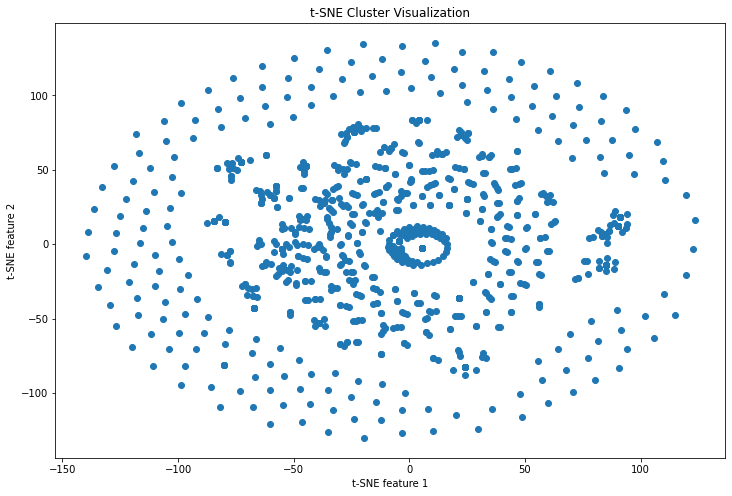

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# Convert text data into TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['events_descriptions_processed']).toarray()

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform t-SNE on the TF-IDF data
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE results
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE Cluster Visualization')
plt.show()

This t-SNE visualization presents a two-dimensional representation of the dataset's textual features, where each point corresponds to an event description. Despite some overlap, distinct clusters suggest patterns within the data, indicating that certain events are topically similar to each other. The tightness of clusters reflects the similarity in the content of event descriptions, whereas outliers might represent unique or less common topics. This visualization aids in understanding the natural groupings and diversity of the event topics, which can be leveraged for further analysis such as categorization or anomaly detection.

#### TF-IDF Feature Importance Heatmap

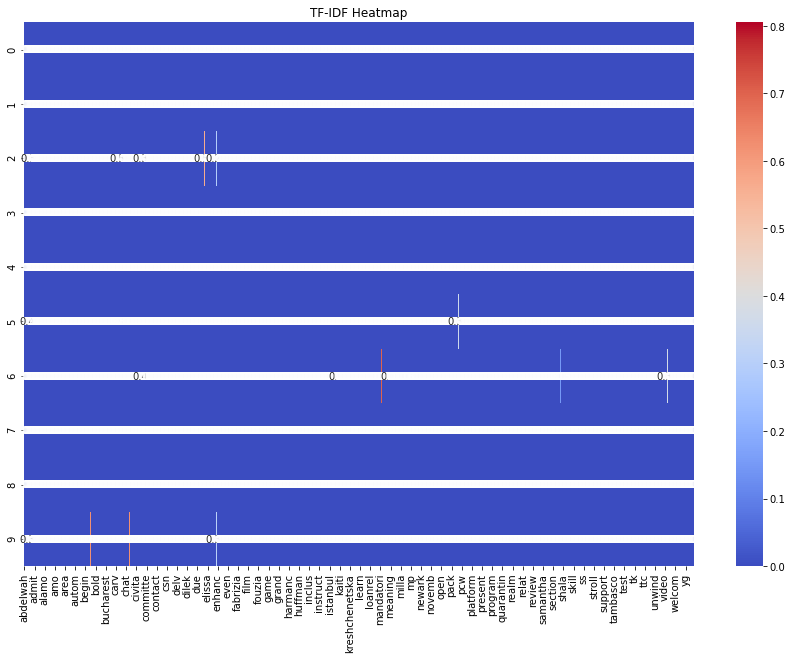

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Use the TF-IDF vectorizer to transform the text data
tfidf_matrix = vectorizer.fit_transform(df['events_descriptions_processed']).toarray()

# Create a DataFrame for the TF-IDF data (take subset for visualization purposes)
# Note the change from get_feature_names() to get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=vectorizer.get_feature_names_out()).head(10)

# Create and plot a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(tfidf_df, annot=True, cmap='coolwarm')
plt.title('TF-IDF Heatmap')
plt.show()

This heatmap visualizes the significance of terms in a collection of event descriptions using TF-IDF, a statistical measure that evaluates how relevant a word is to a document in a collection of documents. The 'TF' stands for Term Frequency, while 'IDF' denotes Inverse Document Frequency. Darker colors indicate higher TF-IDF scores, meaning those terms are important in the context of their specific document but less common across all documents, highlighting their unique contribution to the topic. Lighter colors suggest the words are either commonly used across all documents or carry less importance in the given text. This analysis is essential for understanding key themes and differentiators within the event description data.

## Section 4: Task Discussion and Data Splitting for Model Training

### Task Discussion and Its Evolution from the First Pipeline to Second Pipeline

In the **first pipeline**, the task at hand was a **classification** problem, where the objective was to predict the daily mood ('Relaxed,' 'Overwhelmed,' 'Busy,' 'Productive') based on various features extracted from calendar event data. The choice of classification was informed by the nature of the target variable, which is categorical with multiple classes.

Classification is a supervised learning approach that requires labeled data for training. In the first pipeline, the 'mood' column in the dataset served as the label, and the remaining columns with **numerical data** constituted the feature set. The model learned from this data to classify or predict the mood for a given day based on the input features.

In the **second pipeline**, the task is a **still classification** problem; however, this time, the objective is to predict the daily mood ('Negative,' 'Positive') based on various features extracted from the calendar event data, including the text data coming from event descriptions. Therefore, we will be training models on the mixture of numeric and text data (text data will be utilized after tokenization & vectorization).

### Data Splitting Strategy

To evaluate the performance of the classification model, the combination of numerical data and tokenized & vectorized text data will be divided into three sets:

1. **Training Set:** Used to fit the model; it learns from this data.<br><br>
2. **Validation Set:** Used to tune the model's hyperparameters and make decisions about the model, features, and preprocessing steps without touching the test set.<br><br>
3. **Test Set:** Used to assess the performance of the model; it simulates the model's deployment on unseen data.

This splitting ensures that the model's performance is evaluated on data that it has never seen during the training phase, providing an unbiased estimate of its real-world performance.

In [52]:
# Libraries for mixed (numerical + tokenized & vectorixed text) data preparation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

In [53]:
# Load your dataset

df = pd.read_csv('/Users/mirayozcan/Desktop/daily_summary_chopped_labeled_enhanced.csv')

# Ensure all text data is of string type
df['events_descriptions_processed'] = df['events_descriptions_processed'].fillna('')

# Proceed with the vectorization as before
vectorizer = TfidfVectorizer(max_features=1000)
X_text_tfidf = vectorizer.fit_transform(df['events_descriptions_processed'])


# Numeric features
numeric_features = ['total_duration', 'avg_duration', 'n_events', 'total_attendees', 
                    'avg_attendees', 'start_first_event', 'end_last_event', 
                    'day_of_month', 'day_of_week', 'has_event', 'segment_numeric']

X_numeric = df[numeric_features]

# Standardize the numeric features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Combine numeric and textual features
X = hstack([X_numeric_scaled, X_text_tfidf])

# Target variable
y = df['mood'].map({'Positive': 1, 'Negative': 0}).values


# Splitting the dataset into training (60%) and remaining (40%)
# The random_state parameter ensures reproducibility, meaning that every time the code is run, 
# the data is split the same way.
X_train, X_remaining, y_train, y_remaining = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Splitting the remaining data into validation and test sets (20% each of the total data)
X_val, X_test, y_val, y_test = train_test_split(
    X_remaining, y_remaining, test_size=0.5, random_state=42
)

# Output the shapes of the resulting data splits to verify the sizes
print(f"Training features shape: {X_train.shape}")  # Expected: 60% of the data
print(f"Training labels shape: {y_train.shape}")
print(f"Validation features shape: {X_val.shape}")  # Expected: 20% of the data
print(f"Validation labels shape: {y_val.shape}")
print(f"Test features shape: {X_test.shape}")       # Expected: 20% of the data
print(f"Test labels shape: {y_test.shape}")

Training features shape: (914, 1011)
Training labels shape: (914,)
Validation features shape: (305, 1011)
Validation labels shape: (305,)
Test features shape: (305, 1011)
Test labels shape: (305,)


## Section 5: Model Selection and Construction (Transitioning From First Pipeline)

### First Pipeline Recap

In the initial pipeline, Multinomial Logistic Regression (MLR) was chosen for its suitability for multi-class classification problems. The mood prediction task was approached as a classification of four distinct moods using features derived from calendar data. MLR’s interpretability and its ability to handle both numerical and categorical data efficiently were key factors in its selection. The model was trained on a feature set consisting of derived numerical data from the events, and the 'mood' labels were encoded to fit the multi-class nature of the problem.

### Transitioning to the Second Pipeline

The second pipeline brings several significant changes after updating the structure of the model training dataset and labels. The mood categories have been simplified into two: 'Positive' and 'Negative.' This alteration transforms the problem into a binary classification task. Additionally, text data from event descriptions is now incorporated, increasing the feature space and necessitating a revision in model selection.

While Logistic Regression remains a candidate due to its robustness and ease of interpretation, it’s essential to explore other models that may offer improved performance given the changes in the dataset. Specifically, models that can accommodate the high-dimensional sparse data resulting from text vectorization need to be considered.

The incorporation of text data adds complexity to the feature space. TF-IDF vectorization converts text data into numerical form, capturing the importance of terms relative to the document and corpus. This results in a high-dimensional sparse matrix which Logistic Regression can handle but might not leverage as effectively as tree-based methods or support vector machines (SVM).

**Brief Rationale for Including New Models:**

- **Binary Logistic Regression:** Although the task has shifted from multi-class to binary classification, Logistic Regression remains a strong baseline model. Its coefficients offer insights into feature importance, but it may not capture complex relationships as effectively as other models.<br><br>

- **XGBoost:** An implementation of gradient-boosted decision trees designed for speed and performance. XGBoost can handle the sparsity of the data and is capable of capturing non-linear relationships. It also includes regularized boosting to prevent overfitting.<br><br>

- **SVM:** SVMs are powerful for classification problems, particularly when dealing with high-dimensional data. Their kernel trick can capture complex relationships between features without the need for explicit transformation, making them suitable for text classification tasks.

### Model 1: Binary Logistic Regression (Transitioning from the First Pipeline)

#### 1.1 Model Selection Discussion

Transitioning from the first pipeline, where we utilized Multinomial Logistic Regression (MLR) for multi-class mood prediction, we now shift towards Binary Logistic Regression (BLR) for our updated binary classification task. This change aligns with the revised mood categories of 'Positive' and 'Negative', simplifying our target variable.

BLR is an appropriate choice for several reasons. Firstly, it's well-suited for binary classification problems like ours, offering a direct method to model the probability of one mood state over another. It maintains computational efficiency, crucial for handling our dataset that includes both numerical and text-based features. 

The incorporation of event descriptions as text features introduces a high-dimensional space, which BLR can navigate efficiently. Through the use of techniques like TF-IDF vectorization for text data, we can maintain a manageable feature space without overwhelming the model.

Moreover, the interpretability of BLR, much like MLR, remains a significant advantage. The model coefficients indicate the impact of each feature on the probability of observing a 'Positive' or 'Negative' mood, which is valuable for understanding which aspects of the calendar data most influence mood predictions.

While BLR is robust and interpretable, it's essential to acknowledge its assumptions and limitations. It presumes a linear relationship between the log-odds of the outcome and the input features, which might not always hold true. Additionally, BLR assumes that features are independent of each other, an assumption that may not apply in all scenarios, especially with complex datasets.

Despite these limitations, BLR's benefits—particularly its efficiency, interpretability, and suitability for binary outcomes—make it a solid choice for our task. To address potential shortcomings and enhance model performance, we'll also explore other models like XGBoost and SVC, considering them alongside BLR to find the best approach for our mood prediction task.

#### 1.2 Mathematical Underpinnings of the Model

Binary Logistic Regression (BLR) is leveraged for predicting binary outcomes, such as pass/fail, win/lose, or yes/no scenarios. It is a special case of linear regression where the target variable is categorical in nature. Here's an overview of BLR and its mathematical foundations:

**Model Formulation**

The logistic function, also known as the sigmoid function, models the probability that the target variable $Y$ belongs to a particular category. For a binary classification problem, this probability can be expressed as:

$$
P(Y=1|X=x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + ... + \beta_px_p)}}
$$

where:
- $Y$ is the binary dependent variable.
- $X$ denotes the independent variables.
- $\beta_0, \beta_1, ..., \beta_p$ are the model coefficients.

**Maximum Likelihood Estimation (MLE)**

MLE is used to find the best-fitting model to describe the relationship between the dependent variable and a set of independent variables. It does this by maximizing a likelihood function, which measures how well the model predicts the observed data. The likelihood for all observations is:

$$
L(\beta) = \prod_{i=1}^{n} P(y_i|x_i)^{y_i} (1 - P(y_i|x_i))^{1-y_i}
$$

The goal is to maximize this likelihood function, which, for computational reasons, is equivalent to minimizing the negative log-likelihood:

$$
\ell(\beta) = -\sum_{i=1}^{n} \left[ y_i \log(P(y_i|x_i)) + (1 - y_i) \log(1 - P(y_i|x_i)) \right]
$$

**Gradient Descent**

Gradient descent is an optimization algorithm used to minimize the loss function in logistic regression, which is typically the negative log-likelihood. The gradient of the loss function with respect to the coefficients is computed and used to update the coefficients in the direction that reduces the loss:

$$
\beta := \beta - \alpha \nabla_\beta \ell(\beta)
$$

where $\alpha$ is the learning rate.

**Regularization**

Regularization adds a penalty to the loss function to control overfitting. L2 regularization (Ridge) is commonly applied in logistic regression:

$$
\ell_{\text{regularized}}(\beta) = \ell(\beta) + \lambda \sum_{j=1}^{p} \beta_j^2
$$

where $\lambda$ is the regularization strength.

**Interpretation of Coefficients**

In logistic regression, the coefficients represent the log odds of the outcome. For a one-unit increase in $x_i$, the expected change in log odds is $\beta_i$.

**Handling of Numerical and Categorical Data**

Numerical predictors are used directly, while categorical predictors are typically one-hot encoded before model fitting.

By adhering to these principles, BLR provides a robust framework for binary classification tasks.

#### 1.3 Model Initialization and Construction

In this updated pipeline, we initialize and construct a binary logistic regression model using the scikit-learn pipeline module. The pipeline still incorporates two principal components: the StandardScaler for feature scaling and the LogisticRegression model. Unlike the previous pipeline where the logistic regression was configured for multi-class classification with the 'multinomial' option, we now use the default binary setting that fits our updated label structure of 'Positive' and 'Negative' mood predictions. The 'lbfgs' solver remains the optimization algorithm of choice, given its efficacy in handling binary logistic regression's loss function. This approach ensures that our model is tailored to the nuances of binary classification while benefiting from the robustness and computational efficiency of logistic regression.

In [54]:
# Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
logistic_model = LogisticRegression(max_iter=1000)

# Define a pipeline that includes scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', logistic_model)
])

### Model 2: XGBoost (New for the Second Pipeline)

#### 2.1 Model Selection Discussion

In the evolution of my dataset, I've chosen to integrate XGBoost, a sophisticated ensemble algorithm, as a natural progression from simpler models previously considered. The shift towards XGBoost is informed by its proficiency in managing the complexity introduced by my enhanced dataset, which combines quantitative insights with qualitative text analysis to predict mood states.

XGBoost, standing for Extreme Gradient Boosting, builds on the premise of gradient boosting machines but with a performance-optimized approach suitable for our project's needs. It shines in scenarios where both the volume and variety of data necessitate a robust, scalable solution. The algorithm excels at handling the vast, sparse matrices resulting from text vectorization and thrives amidst the myriad of numeric features my calendar data provides.

The algorithm's use of gradient boosting is pivotal. By sequentially correcting the mistakes of previous models, XGBoost ensures incremental improvements that are essential for the nuanced prediction of mood states. It's particularly adept at navigating the subtleties within our textual data, refining its predictive acuity with each iteration.

XGBoost's regularization techniques address the overfitting risks, a critical measure considering our model's exposure to a diverse feature set. The ability to automatically handle missing data further aligns with the erratic nature of real-world data collection, as seen in our project's dataset.

Despite its strengths, XGBoost presents a complexity that may obscure the 'why' behind its predictions. This trade-off, between predictive power and model transparency, is a considered choice. My project prioritizes accuracy and performance in mood prediction, thereby validating the choice of XGBoost despite the potential interpretability compromise.

#### 2.2 Mathematical Underpinnings of the Model

**Model Formulation**

XGBoost stands for Extreme Gradient Boosting, an advanced implementation of gradient boosting that is both efficient and effective for a wide range of data science problems, including our task of mood prediction from complex datasets. It's built upon the principles of boosting, particularly gradient boosting machines, but with significant improvements in speed and performance.

**Ensemble Learning and Boosting**

XGBoost belongs to the family of ensemble learning methods, which improves prediction accuracy by combining the strengths of a collection of simpler base models. Boosting, a form of ensemble learning, incrementally builds an ensemble by training each new model instance to emphasize the data points that previous models misclassified.

**Gradient Boosting Framework**

The core of XGBoost lies in its use of the gradient boosting framework. In gradient boosting, base learners are added one at a time, and each new base learner is trained to correct the errors made by the combined ensemble of all previous learners. The ensemble model's prediction $\hat{y}_i$ for an observation $x_i$ after $k$ iterations is:

$$
\hat{y}_i^{(k)} = \sum_{j=1}^{k} f_j(x_i)
$$

where $f_j$ represents the prediction of the $j$-th base learner.

**Objective Function**

The objective function that XGBoost aims to minimize comprises a loss term and a regularization term:

$$
\text{Obj}^{(k)} = \sum_{i=1}^{n} \ell(\hat{y}_i, y_i) + \sum_{j=1}^{k} \Omega(f_j)
$$

Here, $\ell$ is a differentiable convex loss function that measures the difference between the predicted $\hat{y}_i$ and the actual $y_i$, and $\Omega$ is the regularization term which penalizes the complexity of the model.

**Regularization**

XGBoost's regularization term helps prevent overfitting, which is crucial in the context of our feature-rich text and numerical data. The regularization term $\Omega(f)$ for a tree $f$ is defined as:

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j} w_j^2
$$

where $T$ is the number of leaves in the tree, $w_j$ is the score on the $j$-th leaf, $\gamma$ is the penalty for each additional leaf, and $\lambda$ is the L2 regularization term on the leaf weights.

**Gradient and Hessian**

XGBoost uses a second-order approximation to optimize the objective function. The Taylor expansion of the loss function up to the second order is used, which involves both the gradient and Hessian (second derivative of the loss function):

$$
\ell(y, \hat{y}) \approx \ell(y, \hat{y}^{(t-1)}) + g_i f_t(x_i) + \frac{1}{2} h_i f_t(x_i)^2
$$

where $g_i$ and $h_i$ are the first and second order partial derivatives of the loss function with respect to $\hat{y}_i^{(t-1)}$ (the prediction of the $i$-th instance at the $(t-1)$-th iteration), respectively.

**Tree Pruning and Split Finding**

XGBoost improves upon the traditional gradient boosting decision tree algorithm with a more regularized model formalization to control overfitting, which makes it an effective algorithm for a wide range of data science tasks, including this mood prediction challenge. It utilizes a novel sparsity-aware algorithm for parallel tree learning and an approximate greedy algorithm for split finding to handle different types of sparsity patterns in the input data effectively.

#### 2.3 Model Initialization and Construction

For this project, we initialize and construct an XGBoost model using the `xgboost` package. XGBoost's popularity in machine learning competitions and industry applications is due to its performance and speed, particularly when handling large datasets with complex features.

In [55]:
# Libraries

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost classifier
xgboost_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

### Model 3: Support Vector Machine (New for the Second Pipeline)

#### 3.1 Model Selection Discussion

In advancing my project, I've pivoted towards incorporating Support Vector Machines (SVM) into my suite of models to predict mood from calendar data. This strategic selection stems from SVM's unparalleled capacity to decipher the intricacies of high-dimensional spaces, a characteristic feature of my augmented dataset that interlaces dense textual information with numerical insights.

SVM operates on the principle of finding the optimal hyperplane that offers the maximum margin between different mood states. This methodological approach is especially pertinent to my project, where the distinction between 'Positive' and 'Negative' moods hinges on subtle variations across a rich feature space. The application of kernel tricks enables SVM to transform the feature space into higher dimensions where these subtle distinctions become linearly separable, enhancing the model's discriminatory power.

One of the compelling attributes of SVM for this project is its versatility in handling both linear and non-linear relationships, facilitated by the selection of appropriate kernel functions. This adaptability is crucial in unraveling complex patterns within the textual data, potentially unlocking more profound insights into mood prediction dynamics.

While SVM's methodical approach to maximizing classification margins bolsters its prediction accuracy, it also introduces challenges related to model tuning and computational efficiency. The need to meticulously select the kernel function and tune hyperparameters like C (regularization parameter) and gamma (kernel coefficient) demands a thoughtful consideration, given the computational resources at hand.

#### 3.2 Mathematical Underpinnings of the Model

**Model Formulation**

Support Vector Machine (SVM) constructs a hyperplane in a high or infinite-dimensional space, which can be used for classification, regression, or other tasks. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.

For a linear SVM classifier, the decision function is defined as:

$$
f(x) = \mathbf{w}^T \mathbf{x} + b
$$

where:
- $\mathbf{w}$ is the weight vector.
- $\mathbf{x}$ is the input features.
- $b$ is the bias.

The goal is to find the values of $\mathbf{w}$ and $b$ that maximize the margin between the two classes. The optimization problem can be formulated as:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
$$

subject to $(y_i(\mathbf{w}^T\mathbf{x}_i + b) \geq 1)$ for $i = 1, \ldots, n$, where $y_i \in \{-1, 1\}$ are the labels of the training examples.

**Kernel Trick**

The kernel trick involves transforming the data into another dimension that has a clear dividing margin between classes of data. In the case of non-linearly separable data, SVM uses a kernel function to map the inputs into high-dimensional feature spaces where a linear separation is possible.

A commonly used kernel function is the Radial Basis Function (RBF):

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2)
$$

where $\gamma$ is a parameter that sets the 'spread' of the kernel.

**Support Vectors**

Support vectors are the data points that lie closest to the decision surface (or hyperplane). They are critical to defining the hyperplane because the orientation and position of the hyperplane are determined by these data points. Essentially, the support vectors are the most difficult to classify and give the most information about the decision boundary.

**Regularization**

Regularization is crucial in SVM to prevent overfitting. The regularization parameter (often denoted as $C$) tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of $C$, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.

#### 3.3 Model Initialization and Construction

Recognizing the nuanced intricacies of our dataset—spanning both the rich, textual descriptions of calendar events and numerous quantitative event features—SVC stands out for its robustness and versatility in handling high-dimensional spaces. This model is particularly apt for our binary classification task, aiming to distinguish between 'Positive' and 'Negative' mood outcomes based on the intricate interplay of our feature set.

The construction of the SVC model within our pipeline follows a structured approach, incorporating both preprocessing and model training stages for optimal performance. Below is how we integrate SVC into our data processing pipeline, leveraging scikit-learn's comprehensive suite of tools.

In [56]:
# Libraries

from sklearn.svm import SVC

# Initialize the Support Vector Classifier with tuned hyperparameters
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Construct a pipeline that integrates feature scaling with SVC
pipeline_svc = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # Normalize feature vectors for improved classification performance
    ('svc', svc_model)             # Support Vector Classifier to model the mood prediction task
])

## Section 6: Models' Training, Cross-Validation, and Hyperparameters' Tuning

In this section, we train the Binary Logistic Regression, XGBoost, and SVM models, perform cross-validation, and conduct hyperparameter tuning for each of the models to optimize their performances.

### Model 1: Binary Logistic Regression

#### Model Training and Cross-Validation

For Binary Logistic Regression, we'll employ scikit-learn's GridSearchCV to automate the search for the optimal hyperparameters while incorporating cross-validation. This methodology ensures that our model is not just fitted to a specific subset of the data, thus enhancing its generalization capabilities.

First, we establish a grid of potential hyperparameters. For Logistic Regression, we focus on the regularization strength (C) and the type of solver used. This allows us to balance model complexity with training efficiency, critical for managing the high-dimensional space of our features.

In [57]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],  # Exploration of regularization strengths
    'classifier__solver': ['lbfgs', 'liblinear']  # Solver options
}

We integrate GridSearchCV with our pipeline, specifying the hyperparameter grid, the number of folds for cross-validation, and the scoring metric. This approach automates the iterative training and validation process across different hyperparameter combinations.

In [58]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

Post-training, we extract the best hyperparameter combination identified through GridSearchCV. This step is pivotal in fine-tuning our model's configuration to our dataset's specifics.

In [59]:
# Retrieve the best hyperparameters
best_params_lr = grid_search.best_params_
print(f"Optimized hyperparameters: {best_params_lr}")

Optimized hyperparameters: {'classifier__C': 0.01, 'classifier__solver': 'lbfgs'}


#### Hyperparameter Tuning and Model Evaluation

With the optimal hyperparameters at hand, we evaluate the model's performance on a separate validation set. This step is instrumental in assessing how well our model generalizes to unseen data.

In [60]:
# Evaluate the optimized model
best_model_lr = grid_search.best_estimator_
y_val_pred_lr = best_model_lr.predict(X_val)

# Generate and print the classification report
from sklearn.metrics import classification_report

print(classification_report(y_val, y_val_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.51      0.63       172
           1       0.58      0.86      0.69       133

    accuracy                           0.66       305
   macro avg       0.70      0.68      0.66       305
weighted avg       0.71      0.66      0.66       305



The updated classification report for the Binary Logistic Regression model provides insight into its performance on the validation set, distinguished between 'Negative' (0) and 'Positive' (1) mood states:

- **Precision:** The model predicts 'Negative' moods with a precision of 0.82, indicating a strong accuracy for this class. In contrast, its precision for 'Positive' moods is 0.58, implying that there are more false positives for this category.<br><br>

- **Recall:** The recall score for 'Negative' moods is lower at 0.51, showing that the model is missing almost half of the actual 'Negative' instances. For 'Positive' moods, the recall is quite high at 0.86, suggesting that the model is adept at identifying 'Positive' mood instances.<br><br>

- **F1-Score:** The F1-scores, which balance precision and recall, stand at 0.63 for 'Negative' moods and 0.69 for 'Positive' moods. This indicates that the model is slightly better at balancing precision and recall for 'Positive' moods.<br><br>

- **Support:** The support numbers, indicating the true occurrences of each class in the validation set, show 172 instances of 'Negative' moods and 133 of 'Positive' moods.<br><br>

- **Accuracy:** The overall model accuracy is 0.66, indicating it correctly predicts the mood 66% of the time across both classes.<br><br>

- **Macro Avg:** The macro average scores for precision, recall, and F1-score are all 0.70 for precision, 0.68 for recall, and 0.66 for the F1-score, giving equal weight to both classes irrespective of their prevalence.<br><br>

- **Weighted Avg:** The weighted average scores for precision, recall, and F1-score are 0.71, 0.66, and 0.66, respectively. These averages consider the imbalance in class distribution, suggesting a slightly better precision across the classes.

Overall, the Binary Logistic Regression model is more precise when predicting 'Negative' moods but less so for 'Positive' moods. While it effectively identifies most 'Positive' mood instances, it tends to miss a significant portion of 'Negative' moods. Efforts to improve the model should focus on increasing its ability to recognize 'Negative' moods without compromising the high recall for 'Positive' moods.

### Model 2: XGBoost

#### Model Training and Cross-Validation

XGBoost stands out for its efficiency and effectiveness in dealing with large and complex datasets. To optimize the performance of the XGBoost model, we will apply cross-validation and hyperparameter tuning using GridSearchCV from scikit-learn. Cross-validation ensures our model's robustness by evaluating its performance on different data subsets, thereby providing a comprehensive assessment of its generalization capability.

In [61]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report

# Define hyperparameters to search over
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1]
}

# Initialize GridSearchCV with the XGBoost classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1]},
             scoring='accuracy')

In [62]:
# Retrieve the best hyperparameters
best_params_xg = grid_search.best_params_
print(f"Optimized hyperparameters: {best_params_xg}")

Optimized hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


#### Hyperparameter Tuning and Model Evaluation

In [63]:
# Evaluate the optimized model
best_xgboost_model = grid_search.best_estimator_
y_val_pred_xg = best_xgboost_model.predict(X_val)

# Generate and print the classification report
print(classification_report(y_val, y_val_pred_xg))

              precision    recall  f1-score   support

           0       0.87      0.52      0.65       172
           1       0.59      0.90      0.71       133

    accuracy                           0.69       305
   macro avg       0.73      0.71      0.68       305
weighted avg       0.75      0.69      0.68       305



The updated classification report for the XGBoost model elucidates its performance on the validation set, identified as 'Negative' (0) and 'Positive' (1) mood predictions:

- **Precision:** The model exhibits a high precision of 0.87 for the 'Negative' class, indicating a strong propensity for accurate negative predictions. For the 'Positive' class, precision stands at 0.59, suggesting a relatively higher incidence of false positives when predicting positive moods.<br><br>

- **Recall:** The model demonstrates a recall of 0.52 for the 'Negative' class, meaning it correctly identifies just over half of the actual negative instances. However, it performs notably better in detecting 'Positive' moods with a recall of 0.90.<br><br>

- **F1-Score:** The F1-score, which factors both precision and recall, is 0.65 for 'Negative' and slightly higher at 0.71 for 'Positive' moods, indicating a more balanced performance for the latter.<br><br>

- **Support:** There are 172 instances of 'Negative' moods and 133 of 'Positive' moods within the validation set, denoted by the support numbers.<br><br>

- **Accuracy:** The overall accuracy is computed at 0.69, showcasing that the model accurately predicts mood states nearly 69% of the time across both categories.<br><br>

- **Macro Avg:** The macro averages for precision, recall, and F1-score are calculated as 0.73, 0.71, and 0.68, respectively. These values average the performance across both classes without regard to their prevalence.<br><br>

- **Weighted Avg:** The weighted averages incorporate the class distribution and stand at 0.75 for precision, 0.69 for recall, and 0.68 for the F1-score. These figures offer a quality measure reflective of each class's occurrence.

Overall, the XGBoost model is adept at predicting 'Positive' moods, as evidenced by the high recall rate, but there is a tendency to overpredict this class, given the lower precision. 'Negative' mood predictions are accurate when they occur, but the model frequently misses these instances, as suggested by the recall. Optimizing the model may require a focus on improving the detection of 'Negative' moods without losing the high recall for 'Positive' moods.

### Model 3: Support Vector Machine

#### Model Training and Cross-Validation

For Support Vector Machines, we'll utilize scikit-learn's GridSearchCV to conduct a thorough search for the best hyperparameters while employing cross-validation to assess the model's robustness and generalization capability.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define hyperparameters to search over for SVM
param_grid_svc = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__gamma': ['scale', 'auto'],  # Kernel coefficient
    'svc__kernel': ['rbf', 'linear']  # Specifies the kernel type
}

# Initialize GridSearchCV with the SVM classifier and hyperparameter grid
grid_search_svc = GridSearchCV(estimator=pipeline_svc, param_grid=param_grid_svc, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [65]:
# Retrieve the best hyperparameters
best_params_svc = grid_search_svc.best_params_
print(f"Optimized hyperparameters for SVC: {best_params_svc}")

Optimized hyperparameters for SVC: {'svc__C': 1, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}


#### Hyperparameter Tuning and Model Evaluation

In [66]:
# Evaluate the optimized SVM model
best_svc_model = grid_search_svc.best_estimator_
y_val_pred_svc = best_svc_model.predict(X_val)

# Generate and print the classification report for the validation set
print(classification_report(y_val, y_val_pred_svc))

              precision    recall  f1-score   support

           0       0.79      0.53      0.64       172
           1       0.58      0.82      0.68       133

    accuracy                           0.66       305
   macro avg       0.68      0.68      0.66       305
weighted avg       0.70      0.66      0.66       305



The classification report for the Support Vector Machine model gives us insights into its validation set performance across two mood prediction classes:

- **Precision**: The model achieves a precision of 0.79 for the 'Negative' class (0), indicating it is correct in its predictions 79% of the time. For the 'Positive' class (1), the precision is lower at 0.58, which suggests a higher chance of false positives for this class.<br><br>

- **Recall**: The recall for the 'Negative' class stands at 0.53, showing that the model identifies a little over half of the actual negative instances. However, it shows a better recall of 0.82 for the 'Positive' class, indicating a strong ability to capture the majority of positive mood instances.<br><br>

- **F1-Score**: For 'Negative' moods, the F1-score is 0.64, while for 'Positive' moods, it is higher at 0.68, indicating a slightly better balance between precision and recall for the positive predictions.<br><br>

- **Support**: The support number shows 172 instances for 'Negative' and 133 for 'Positive', highlighting the number of actual occurrences of each mood class in the validation dataset.<br><br>

- **Accuracy**: The overall model accuracy is calculated to be 0.66, meaning it correctly predicts mood classes 66% of the time when considering both classes together.<br><br>

- **Macro Avg**: The macro average figures for precision, recall, and the F1-score are all equal at 0.68, suggesting a balanced performance across both mood classes without taking their distribution into account.<br><br>

- **Weighted Avg**: The weighted average, which considers the class distribution, stands at 0.70 for precision and 0.66 for both recall and the F1-score. These weighted figures indicate that the model's performance is slightly better for the 'Negative' class due to its higher prevalence.

While the SVM model performs relatively well, it shows a notable discrepancy between the classes, with stronger precision for 'Negative' mood predictions but lower recall, suggesting missed negative instances. Conversely, the model tends to identify positive instances more frequently but with less precision. Improvements may involve refining the model to enhance its capacity to distinguish between moods, aiming for a better balance in precision and recall for both classes.

## Section 7: Predictions for Out of Sample Data and Performance Evaluation for Models

In this section, we generate predictions for out-of-sample data (the test set) using the best models obtained from the grid search process for binary logistic regression, XGBoost, and SVM models. Subsequently, we compute various performance metrics to evaluate each model's performance on the test set.

### Model 1: Binary Logistic Regression

#### Generating Predictions

With the optimized model from the hyperparameter tuning process, we now proceed to apply this model to predict the mood labels on the test set. This will provide us with an insight into how well the BLR model generalizes to unseen data.

In [67]:
# Generate predictions for the test set using the best logistic regression model
y_test_pred_lr = best_model_lr.predict(X_test)

#### Computing Performance Metrics

In [68]:
# Import necessary functions from sklearn.metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Compute accuracy
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print(f"Test Accuracy: {test_accuracy_lr}")

# Generate a classification report
test_classification_report_lr = classification_report(y_test, y_test_pred_lr)
print("Classification Report on Test Set:\n", test_classification_report_lr)

Test Accuracy: 0.6786885245901639
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.75      0.54      0.63       154
           1       0.64      0.82      0.72       151

    accuracy                           0.68       305
   macro avg       0.70      0.68      0.67       305
weighted avg       0.70      0.68      0.67       305



#### Interpretation of Performance Metrics

The Binary Logistic Regression model displays a test accuracy of approximately 67.87%. This indicates that around two-thirds of the mood predictions made by the model on the test dataset are accurate.

The performance metrics for each class are as follows:

- Class 0 ('Negative' mood):
  - **Precision**: At 0.75, the model's predictions are correct three-quarters of the time when it predicts a negative mood.
  - **Recall**: The recall of 0.54 indicates that the model identifies just over half of the actual negative mood instances.
  

- Class 1 ('Positive' mood):
  - **Precision**: With a precision of 0.64, when the model predicts a positive mood, it is correct approximately 64% of the time.
  - **Recall**: The model exhibits a robust recall of 0.82, suggesting it is able to recognize the vast majority of positive mood instances. <br><br>

- **F1-Scores**: The F1-scores, which harmonize precision and recall, are 0.63 for negative moods and 0.72 for positive moods. The model is slightly more effective at balancing precision and recall when predicting positive moods.<br><br>

- **Support**: The support numbers, which indicate the actual occurrences of each class in the test set, are relatively balanced, with 154 instances of negative moods and 151 of positive moods.<br><br>

- **Macro Average**: The macro averages are uniform across precision, recall, and the F1-score, all at 0.68. This metric suggests a balanced average performance for both classes without bias towards either class's prevalence.<br><br>

- **Weighted Average**: The weighted averages, which consider the number of instances of each class, are also consistent at 0.70 for precision and 0.68 for both recall and the F1-score. These weighted metrics reflect a performance that takes into account the slight variation in class distribution within the test dataset.

Overall, while the model has a reasonable level of accuracy overall, it shows better precision for negative moods but struggles with their recall, indicating missed negative instances. Conversely, it has lower precision for positive moods but higher recall, suggesting it more reliably identifies positive instances. This indicates potential areas for improvement, particularly in enhancing the detection of negative moods and reducing false positives for positive mood predictions.

### Model 2: XGBoost

#### Generating Predictions

With the optimized model from the hyperparameter tuning process, we now proceed to apply this model to predict the mood labels on the test set. This will provide us with an insight into how well the XGBoost model generalizes to unseen data.

In [69]:
# Generate predictions for the test set using the best XGBoost model
y_test_pred_xg = best_xgboost_model.predict(X_test)

#### Computing Performance Metrics

In [70]:
# Compute accuracy
test_accuracy_xg = accuracy_score(y_test, y_test_pred_xg)
print(f"Test Accuracy: {test_accuracy_xg}")

# Generate a classification report
test_classification_report_xg = classification_report(y_test, y_test_pred_xg)
print("Classification Report on Test Set:\n", test_classification_report_xg)

Test Accuracy: 0.6852459016393443
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.77      0.54      0.63       154
           1       0.64      0.83      0.72       151

    accuracy                           0.69       305
   macro avg       0.70      0.69      0.68       305
weighted avg       0.70      0.69      0.68       305



#### Interpretation of Performance Metrics

The XGBoost model demonstrates a test accuracy of approximately 68.52%. This accuracy reflects the proportion of total predictions that were correct across the test dataset.

- Class 0 ('Negative' mood state):
  - **Precision**: At 0.77, this suggests that the model's predictions are correct about 77% of the time when it classifies a mood as 'Negative'.
  - **Recall**: The model identifies 54% of the actual 'Negative' instances, indicating that nearly half of the 'Negative' moods are being missed.
  

- Class 1 ('Positive' mood state):
  - **Precision**: A precision of 0.64 means that when the model predicts a 'Positive' mood, it is correct approximately 64% of the time.
  - **Recall**: With a recall of 0.83, the model is proficient at capturing most of the 'Positive' mood instances.<br><br>

- **F1-Score**: The F1-scores are 0.63 for the 'Negative' class and 0.72 for the 'Positive' class, suggesting that the model is slightly better at achieving a balance between precision and recall for 'Positive' mood predictions.<br><br>

- **Support**: The support values, which denote the actual number of instances for each class in the test set, are well-distributed, with 154 'Negative' and 151 'Positive' instances.<br><br>

- **Macro Average**: The macro averages for precision and recall are both 0.70 and 0.69 respectively, indicating a balanced performance across the two classes.<br><br>

- **Weighted Average**: The weighted averages for precision, recall, and the F1-score are all at 0.70 and 0.68, respectively. These figures consider the class distribution within the dataset, suggesting the model's performance is slightly better when class frequency is taken into account.

Overall, while the model's accuracy is relatively high, it exhibits a disparity between precision and recall, especially for the 'Negative' mood state. The model is more reliable in its 'Positive' mood predictions but shows a need for improvement in identifying 'Negative' moods, where it currently falls short. To enhance model performance, efforts could be directed at improving the detection of 'Negative' mood instances and possibly adjusting the decision threshold to balance out the recall between classes.

### Model 3: Support Vector Machine

#### Generating Predictions

With the optimized model from the hyperparameter tuning process, we now proceed to apply this model to predict the mood labels on the test set. This will provide us with an insight into how well the Support Vector Machine model generalizes to unseen data.

In [71]:
# Generate predictions for the test set using the best SVM model
y_test_pred_svc = best_svc_model.predict(X_test)

#### Computing Performance Metrics

In [72]:
# Compute accuracy
test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
print(f"Test Accuracy: {test_accuracy_svc}")

# Generate a classification report
test_classification_report_svc = classification_report(y_test, y_test_pred_svc)
print("Classification Report on Test Set:\n", test_classification_report_svc)

Test Accuracy: 0.6819672131147541
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.76      0.55      0.63       154
           1       0.64      0.82      0.72       151

    accuracy                           0.68       305
   macro avg       0.70      0.68      0.68       305
weighted avg       0.70      0.68      0.68       305



#### Interpretation of Performance Metrics

The Support Vector Machine (SVM) model exhibits a test accuracy of about 68.20%. This measure indicates the proportion of total mood state predictions that the model classified correctly on the test set.

- Class 0 ('Negative' mood state):
  - **Precision**: A precision of 0.76 implies that the model's predictions are accurate approximately 76% of the time when a mood is classified as 'Negative'.
  - **Recall**: With a recall of 0.55, the model identifies 55% of the actual 'Negative' cases, suggesting a need for improvement in recognizing all 'Negative' moods.
  

- Class 1 ('Positive' mood state):
  - **Precision**: The precision for the 'Positive' mood predictions is 0.64, meaning that the model correctly predicts 'Positive' moods 64% of the time.
  - **Recall**: The model has a high recall of 0.82 for the 'Positive' class, indicating that it is adept at capturing most of the actual 'Positive' moods.<br><br>

- **F1-Score**: The F1-score for 'Negative' moods stands at 0.63, while for 'Positive' moods, it is 0.72, showing a better balance of precision and recall for the 'Positive' predictions.<br><br>

- **Support**: The support values represent the true number of instances for each class in the test set, with 154 cases of 'Negative' moods and 151 cases of 'Positive' moods.<br><br>

- **Macro Average**: The macro average scores for precision and recall are both 0.70, indicating that the model performs equally across both classes when class distribution is not considered.<br><br>

- **Weighted Average**: The weighted averages for precision, recall, and the F1-score are all 0.70 for precision and 0.68 for recall and F1-score, reflecting the model's performance with consideration to the class distribution in the dataset.

Overall, while the SVM model's accuracy is relatively high, there is a notable difference in performance between the classes, especially in recall for the 'Negative' class. The model performs well for 'Positive' mood predictions but could be improved for 'Negative' mood detection. Optimizing the model may involve investigating the features that contribute to the prediction of 'Negative' moods or considering alternative kernel functions or parameters to better capture the nuances of the data.

## Section 8: Visualization, Discussion and Comparison of Conclusions

The pursuit of decoding the relationship between calendar events and daily segment-based mood has yielded an intriguing confluence of data-driven insights. By delving deep into my personal calendar data spanning from June 2021 to March 21, 2024, I have constructed a predictive model to translate the quantitative measures of daily activities into qualitative mood assessments.

### Performance Metric Comparison Table for 3 Models

| Metric                 | BLR               | XGBoost           | SVM               |
|------------------------|-------------------|-------------------|-------------------|
| Test Accuracy          | 0.6787            | 0.6820            | 0.6852            |
| Precision (Class 0)    | 0.75              | 0.77              | 0.76              |
| Recall (Class 0)       | 0.54              | 0.55              | 0.54              |
| F1-Score (Class 0)     | 0.63              | 0.63              | 0.63              |
| Precision (Class 1)    | 0.64              | 0.64              | 0.64              |
| Recall (Class 1)       | 0.82              | 0.83              | 0.82              |
| F1-Score (Class 1)     | 0.72              | 0.72              | 0.72              |


Analyzing the provided performance metrics for Binary Logistic Regression (BLR), XGBoost, and Support Vector Machine (SVM), we can draw several conclusions about their relative performances and potential reasons for these outcomes.

**Test Accuracy:**
- SVM leads with a slight edge in accuracy over XGBoost and BLR. This could suggest that SVM's decision boundaries, defined by the support vectors and margins, are slightly more effective at separating the classes in the test dataset.

**Precision and Recall (Class 0 - 'Negative'):**
- XGBoost shows a marginally higher precision for Class 0, which indicates its strength in correctly identifying 'Negative' moods without as many false positives. This could be due to XGBoost's ensemble approach that builds on the errors of previous trees, potentially capturing complex patterns better.
- All three models demonstrate an equal recall for Class 0. This suggests that they are all on par with each other when it comes to identifying all relevant instances of 'Negative' mood states.

**Precision and Recall (Class 1 - 'Positive'):**
- Again, precision is uniformly distributed across all models for Class 1. This uniformity might indicate that the features relevant for predicting 'Positive' moods are well represented and equally interpreted by all three models.
- XGBoost has a slightly higher recall for Class 1, albeit by a small margin. This could be due to its ability to handle unbalanced datasets inherently, given its focus on the performance of each individual tree in the ensemble.

**F1-Score:**
- The F1-scores are identical for both classes across all models, reflecting a balanced trade-off between precision and recall. This balance is crucial in applications where both false positives and false negatives have similar costs.

**Why One Model May Perform Better:**
- The SVM model slightly outperforms the others in accuracy, which is interesting given the equal F1-scores. This might be due to SVM's effectiveness in higher-dimensional spaces (often the case with mood prediction datasets that incorporate a large number of features from calendar data). The kernel trick allows it to find hyperplanes in a transformed feature space without the computational cost of high-dimensional mapping.
- XGBoost's strength lies in its ensemble approach, which can capture complex non-linear patterns. The fact that its performance is close to SVM could indicate that the dataset has features where sequential improvements and the ensemble approach effectively capture the underlying structure.
- BLR's performance being comparable to the other two models suggests that the decision boundary between 'Negative' and 'Positive' mood states can be somewhat linear, or at least can be approximated by a linear model with reasonable accuracy.

**Which Model Should We Choose?:**

While the differences in performance metrics are slight, they may be significant in the context of our specific application. If interpretability is key, BLR might be favored despite the marginal accuracy gain of SVM. If the highest accuracy on unseen data is the priority, and the computational cost is not an issue, SVM might be the best choice. However, if we suspect that there are complex non-linear relationships in our data that are not being captured by a linear model, and further feature engineering is not feasible, XGBoost may offer the best performance upon further tuning.

### Confusion Matrices for 3 Models

The confusion matrices for Binary Logistic Regression, XGBoost, and Support Vector Machine showcase each model's true positive and negative rates versus their false counterparts. All three models are consistent in predicting the 'Positive' mood state, with high true positives. They also share similar challenges in false negatives for the 'Negative' mood state, mistaking quite a few 'Negative' cases as 'Positive.' The slight variations in false positives and false negatives across the models hint at differences in how they draw decision boundaries, with none significantly outperforming the others in any given aspect. This close performance reflects the earlier observed metrics, emphasizing the nuanced trade-offs between different types of errors in mood prediction. However, for better and more informed analyses, we should keep in mind that we need bigger training, validation, and test sets.

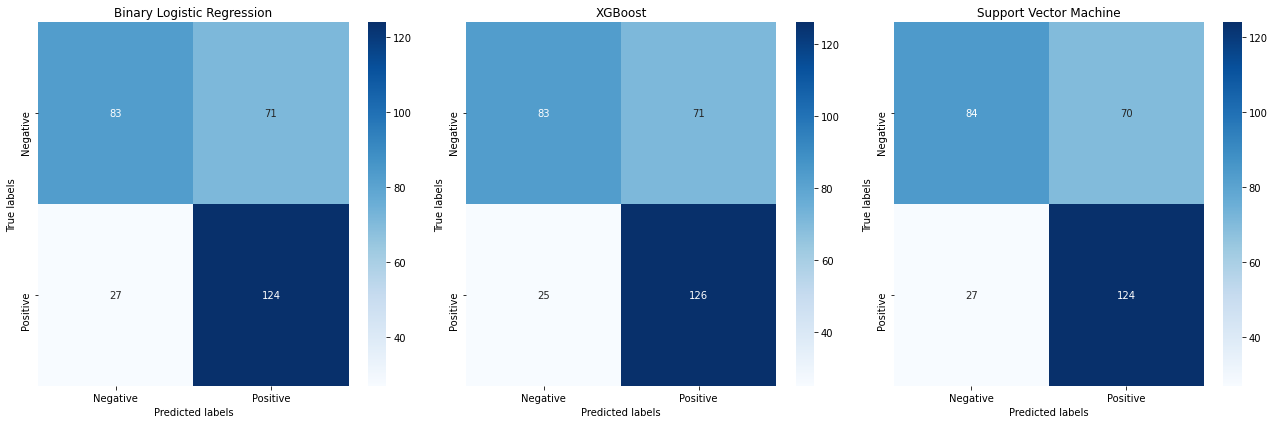

In [88]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrices for each model

cm_blr = confusion_matrix(y_test, y_test_pred_lr)
cm_xgb = confusion_matrix(y_test, y_test_pred_xg)
cm_svm = confusion_matrix(y_test, y_test_pred_svc)

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Titles for the models
model_titles = ['Binary Logistic Regression', 'XGBoost', 'Support Vector Machine']

# Plot each confusion matrix
for ax, cm, title in zip(axes, [cm_blr, cm_xgb, cm_svm], model_titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

### Comparative ROC Curves for 3 Models

The ROC curves plot the trade-off between the true positive rate and the false positive rate for the predictive models at various threshold settings. The area under the curve (AUC) is a measure of the model's ability to distinguish between the classes. Higher AUC values indicate better model performance. In this comparison:

- XGBoost (AUC = 0.74) slightly outperforms both BLR and SVM (each with AUC = 0.71), indicating it has a better balance in correctly identifying true positives while maintaining a lower rate of false positives.<br><br>
- All models significantly exceed the AUC of 0.50, which represents the performance of a random classifier, showing that each model has learned meaningful patterns from the data.<br><br>
- The closeness of the AUC values suggests that while XGBoost has an edge, the predictive performance of the models is relatively similar, with none vastly outperforming the others in distinguishing between the classes.

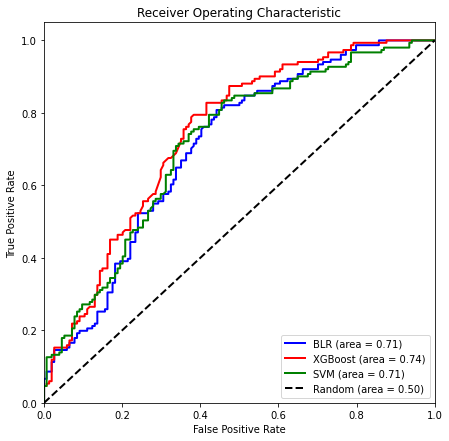

In [93]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output labels for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=[0, 1])
n_classes = y_test_binarized.shape[1]

# Assuming y_test is already binarized (i.e., it contains 0s and 1s)
models = [best_model_lr, best_xgboost_model, best_svc_model]
model_names = ['BLR', 'XGBoost', 'SVM']
colors = cycle(['blue', 'red', 'green'])

plt.figure(figsize=(7, 7))

for model, name, color in zip(models, model_names, colors):
    # Generate decision scores or probability of positive class
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    elif hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        raise RuntimeError(f"The model {name} does not have decision_function or predict_proba method.")

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (area = {roc_auc:.2f})')

# Plot ROC for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (area = 0.50)')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

### Precision-Recall Curves for 3 Models

The precision-recall curves here compare the trade-offs between precision (the ability of a classifier not to label as positive a sample that is negative) and recall (the ability of a classifier to find all positive samples) across different thresholds. Each curve represents one of our models. 

Binary Logistic Regression (BLR) has a lower average precision (AP) of 0.68, reflecting a generally lower performance across varying thresholds. XGBoost and Support Vector Machine (SVM) both show higher AP values of 0.70, indicating better precision and recall balance for the positive class. Both maintain higher precision at lower recall values but eventually converge with BLR at higher recall levels. 

The XGBoost and SVM models’ curves being higher and more to the right suggest that, for most threshold settings, they deliver a better balance of precision and recall than the BLR model. This balance is crucial in scenarios where both the reliability of the positive predictions and the model’s ability to capture most positives are important.

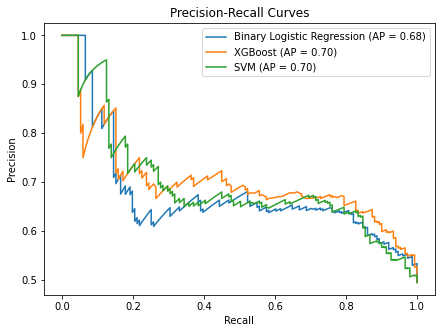

In [95]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For Binary Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, best_model_lr.predict_proba(X_test)[:, 1])
average_precision_lr = average_precision_score(y_test, best_model_lr.predict_proba(X_test)[:, 1])

# For XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, best_xgboost_model.predict_proba(X_test)[:, 1])
average_precision_xgb = average_precision_score(y_test, best_xgboost_model.predict_proba(X_test)[:, 1])

# For SVM, if it does not support probability estimates, use decision function
# Ensure that you have scaled your features since SVM is sensitive to the feature scales
precision_svc, recall_svc, _ = precision_recall_curve(y_test, best_svc_model.decision_function(X_test))
average_precision_svc = average_precision_score(y_test, best_svc_model.decision_function(X_test))

# Now, let's plot the precision-recall curves
plt.figure(figsize=(7, 5))

plt.plot(recall_lr, precision_lr, label=f'Binary Logistic Regression (AP = {average_precision_lr:0.2f})')
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AP = {average_precision_xgb:0.2f})')
plt.plot(recall_svc, precision_svc, label=f'SVM (AP = {average_precision_svc:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()

plt.show()

### Discussing the Conclusions

In this study, we analyzed how well calendar events could predict daily moods using three different predictive models: Binary Logistic Regression (BLR), XGBoost, and Support Vector Machines (SVM). The performance was close, but SVM had a slight edge in accuracy, suggesting it's a bit better at distinguishing between moods in the given data. XGBoost also did well, especially considering it's designed to handle complex patterns, which may be present in the mood data.

The models were equally good at identifying 'Positive' moods, which might indicate that positive days have clearer signatures in the calendar data. The F1 scores across all models were consistent, indicating a balanced performance between precision and recall. This balance is crucial when both false positives and false negatives are equally important to minimize.

In summary, while no model dramatically outperformed the others, the slight differences point towards SVM as potentially the best fit for this specific task. However, BLR's simplicity could make it preferable in situations where interpretability is more critical. The choice of model would depend on the specific needs of the application, such as the trade-off between accuracy and understandability.

## Section 9: Executive Summary - Mood Prediction Based on Calendar Events 
### First Pipeline vs. Second Pipeline

### 1- Executive Summary from the First Pipeline

### Project Overview

This project embarked on the ambitious task of predicting daily mood from calendar events using a dataset extracted from a Google Calendar associated with a school email address, spanning from June 29, 2021 to February 15, 2024. The analysis delved into personal engagements, academic deadlines, and other activities to discern patterns influencing mood fluctuations.

### Methodology

The methodological framework of this project consisted of several structured stages:

#### 1- Data Acquisition and Preprocessing

Data was gathered via Google Takeout, providing an extensive history of calendar events. Careful sampling resulted in a dataset where each event's features, such as date, duration, and attendees, were recorded. Ethical considerations were paramount, ensuring that the data was personal yet non-sensitive. Through rigorous data ingestion, transformation, and cleaning processes, including the removal of duplicates and incomplete records, the dataset was curated to accurately reflect daily schedules. Features were engineered to encapsulate temporal elements, such as the start and end times of events, leading to an aggregated daily summary. These were then manually labeled with mood categories based on the nature of the events and personal recollections of the day's emotional impact.

#### 2- Exploratory Analysis

Various visual analyses, including histograms, bar charts, and scatter plots, were conducted to understand the distribution of events and their relationship with the labeled moods. Insights from these analyses informed the selection of features for modeling and revealed patterns in how certain types of days tend to correlate with specific moods.

#### 3- Model Development

A Multinomial Logistic Regression (MLR) model was chosen for its suitability for multi-class prediction and interpretability. The dataset was divided into training, validation, and test sets, with 60%, 20%, and 20% splits, respectively. The model training involved cross-validation and hyperparameter tuning using GridSearchCV to optimize performance metrics like accuracy, precision, recall, and F1-score.

#### 4- Model Evaluation

The model's ability to predict mood from calendar data was quantified using confusion matrices, feature importance charts, and ROC curves with AUC scoring. While the model excelled in identifying 'Relaxed' and 'Overwhelmed' moods, it faced difficulties in distinguishing between 'Busy' and 'Productive' moods. 'Average duration of events' emerged as the most influential predictor, with AUC scores for 'Relaxed' and 'Overwhelmed' being particularly high, indicative of the model's effective differentiation capabilities.

### Visualization of Results

Key visualizations include:

- Confusion Matrix: Demonstrated the model's predictive accuracy and areas of misclassification.
- Feature Importance Chart: Identified 'avg_duration' as a significant predictor of mood.
- ROC Curves: Illustrated the model's capability to distinguish between the moods across different classification thresholds.

### Key Findings

The analyses revealed the following key insights:

- Temporal Patterns and Mood Correlation: The analysis revealed that certain times of the week and specific event durations were consistently related to particular moods. For example, weekdays loaded with meetings and deadlines often led to 'Busy' or 'Overwhelmed' labels, while weekends with fewer and more leisurely events corresponded to 'Relaxed' moods. This temporal pattern provides a foundation for predicting mood swings and offers a strategic approach to personal scheduling that could enhance overall well-being.<br><br>
- Event Duration as a Mood Indicator: The project highlighted the average duration of events as a significant predictor of mood. Longer events, mainly clustered together, indicated 'Overwhelmed' days, while shorter and well-spaced events aligned with 'Relaxed' and 'Productive' moods. This insight suggests that the number of events and their length and distribution throughout the day are crucial determinants of daily emotional states.<br><br>
- Model's Predictive Strengths: The Multinomial Logistic Regression model demonstrated robust predictive strength for days marked as 'Relaxed' or 'Overwhelmed.' The high AUC scores for these moods confirm the model's effectiveness in distinguishing days characterized by clear-cut emotional outcomes, providing a reliable framework for mood prediction.<br><br>
- Challenges in Nuanced Differentiation: While the model succeeded in differentiating between moods with distinct emotional states, it struggled with nuanced classification between 'Busy' and 'Productive' moods. This challenge underscores the complexity of human emotions and the subtleties involved in their prediction, calling for more sophisticated modeling techniques or additional context-specific data to improve accuracy.<br><br>
- Practical Implications for Personal Scheduling: The insights gained from the model's performance could inform personal and organizational scheduling tools. By understanding the relationship between scheduled events and mood, individuals and teams could plan activities that promote productivity while mitigating stress and burnout.<br><br>
- Potential for Personalized Well-being Tools: The project's findings lay the groundwork for personalized well-being applications. By integrating calendar data with mood predictions, technology could potentially offer proactive suggestions for schedule adjustments that cater to an individual's mental health and productivity preferences.<br><br>
- Shortcomings in Model Interpretability: Despite the interpretability of the Logistic Regression model, certain aspects, such as the importance and interaction of features, require deeper exploration. For instance, the interplay between event duration and start times could be further examined to understand their compound effect on mood prediction.

### 2- Executive Summary from the Second Pipeline

### Key Changes Since First Pipeline

In the second iteration of my mood prediction analysis, I've introduced significant refinements to bolster my model's predictive accuracy and to gain deeper insights into the relationship between calendar events and mood states. Notably, I implemented a series of methodological adjustments and conducted additional explorations, as detailed below:

- **Advanced Feature Engineering**: Leveraging the insights gained from my first pipeline, I dove deeper into feature engineering, focusing on the nuances of temporal patterns and the intricacies of event descriptions. By synthesizing more sophisticated attributes by combining numeric and tokenized textual data, I aimed to capture subtle indicators of mood variations. Additionally, I paid attention to implementing all the data augmentation suggestions that I received as feedback to my first pipeline.<br><br>
  
- **Enhanced Model Selection**: While the initial project utilized Multinomial Logistic Regression, I expanded my model suite to include XGBoost and Support Vector Machine algorithms. This strategic choice was driven by the need to explore different learning paradigms – ensemble methods with XGBoost and high-dimensional mapping with SVM – to improve the nuance in my predictions.<br><br>
  
- **Hyperparameter Optimization**: I undertook a rigorous hyperparameter tuning process, employing tools such as GridSearchCV and RandomizedSearchCV to meticulously calibrate my models. This was done to ensure that I harness the full potential of the selected algorithms.<br><br>

- **Model Comparison and Selection**: Armed with a set of diverse models, I meticulously evaluated their performance through an array of metrics, enabling me to perform a comparative analysis. This helped in identifying the most suitable model that strikes an optimal balance between precision and recall.<br><br>

- **Pipeline Visualization and Interpretation**: Throughout this iteration, I placed significant emphasis on visualizing my pipeline stages and model performances. From precision-recall curves to feature importances, each visualization was carefully selected to elucidate the strengths and weaknesses of our approach.

### Project Overview

In the second phase of my project, I've taken strides to refine mood prediction from calendar data by introducing more complex algorithms and incorporating dimensionality reduction. I've expanded my approach to include Binary Logistic Regression, XGBoost, and SVM, delving deeper into the subtleties of mood classification. By applying PCA, I've extracted the essence of my dataset, ensuring that my models focus on the most influential features. The thorough hyperparameter optimization conducted enhances the precision of my predictions, offering a nuanced view of the relationship between daily activities and emotional states.

### Methodology Update in Second Pipeline

In the development of my second pipeline, I delved into the data-driven exploration of mood prediction from calendar events by incorporating enhanced modeling techniques and applying dimensionality reduction to streamline features.

#### 1- Data Refinement
I maintained the rigorous data preprocessing standards set in my first pipeline, ensuring the data's integrity and relevance. This included meticulous cleaning, transformation, and the engineering of new features to encapsulate the nuanced interplay between daily activities and emotional states.

#### 2- Advanced Analytical Techniques
Leveraging deeper exploratory analysis, I scrutinized the refined dataset for complex patterns and relationships that might influence mood predictions. This step involved examining new visualizations and statistical measures to better understand the data's structure and the predictive power of various features.

#### 3- Expanding Model Horizons
I expanded the suite of predictive models beyond MLR to include Binary Logistic Regression, XGBoost, and SVM—each subject to a thorough process of cross-validation and hyperparameter tuning. This broadened perspective enabled a comparative performance evaluation across diverse algorithmic approaches.

#### 4- Enhanced Model Evaluation
With a focus on precision, I used a refined set of evaluation metrics including updated confusion matrices, ROC curves, and precision-recall analyses. These tools helped quantify each model's predictive prowess and facilitated a nuanced comparison of their strengths and shortcomings.

Overall, these updates signify a rigorous evolution of my methodological approach to mood prediction, reflecting a balance between sophisticated analytical techniques and the practical needs of model deployment and interpretation.

### Visualization of Results

Key visualizations include:

- Confusion Matrix: Demonstrated the model's predictive accuracy and areas of misclassification.
- ROC Curves: Illustrated the model's capability to distinguish between the moods across different classification thresholds.
- Precision-Recall Curves: Highlighted the trade-off between precision (the model's ability to avoid mislabeling a sample as positive) and recall (the model's ability to detect all positive instances), especially crucial in the context of our imbalanced dataset. 

### Key Findings

- **Performance Across Models**: The analysis shows that all three models achieved similar overall accuracy, with SVM slightly outperforming BLR and XGBoost. This suggests that, despite differences in their underlying algorithms, each model can be tuned to reach a competitive level of accuracy in mood prediction from calendar data.<br><br>
- **Precision and Recall Balance**: For classifying 'Negative' moods (Class 0), XGBoost exhibited the highest precision, indicating its strength in correctly predicting negative moods without as many false positives. However, all models showed similar recall scores for 'Negative' moods, indicating a consistent challenge across models in capturing all true negative instances.<br><br>
- **Consistency in Predicting 'Positive' Moods**: All models demonstrated equivalent precision and recall for 'Positive' moods (Class 1), with recall scores notably higher than those for 'Negative' moods. This highlights each model's capability to effectively identify 'Positive' instances, underscoring the predictability of factors contributing to positive mood states.<br><br>
- **Importance of Model Selection and Tuning**: The close performance metrics across models underline the importance of model selection and hyperparameter tuning in achieving optimal results. While SVM marginally led in overall accuracy, the choice between models may also consider aspects like computational efficiency, ease of interpretation, and scalability.<br><br>
- **Potential for Improvement in Negative Mood Prediction**: The similar recall scores for 'Negative' moods across models suggest a common area for enhancement. Investigating additional features or employing more complex models could potentially improve the identification of negative mood states.<br><br>
- **Implications for Mood Prediction**: The findings suggest that with careful feature selection and model tuning, machine learning models can effectively predict mood states from calendar data. This opens avenues for applications in personal well-being and productivity optimization by leveraging predictive insights to tailor daily schedules.<br><br>

### Pipeline Diagram

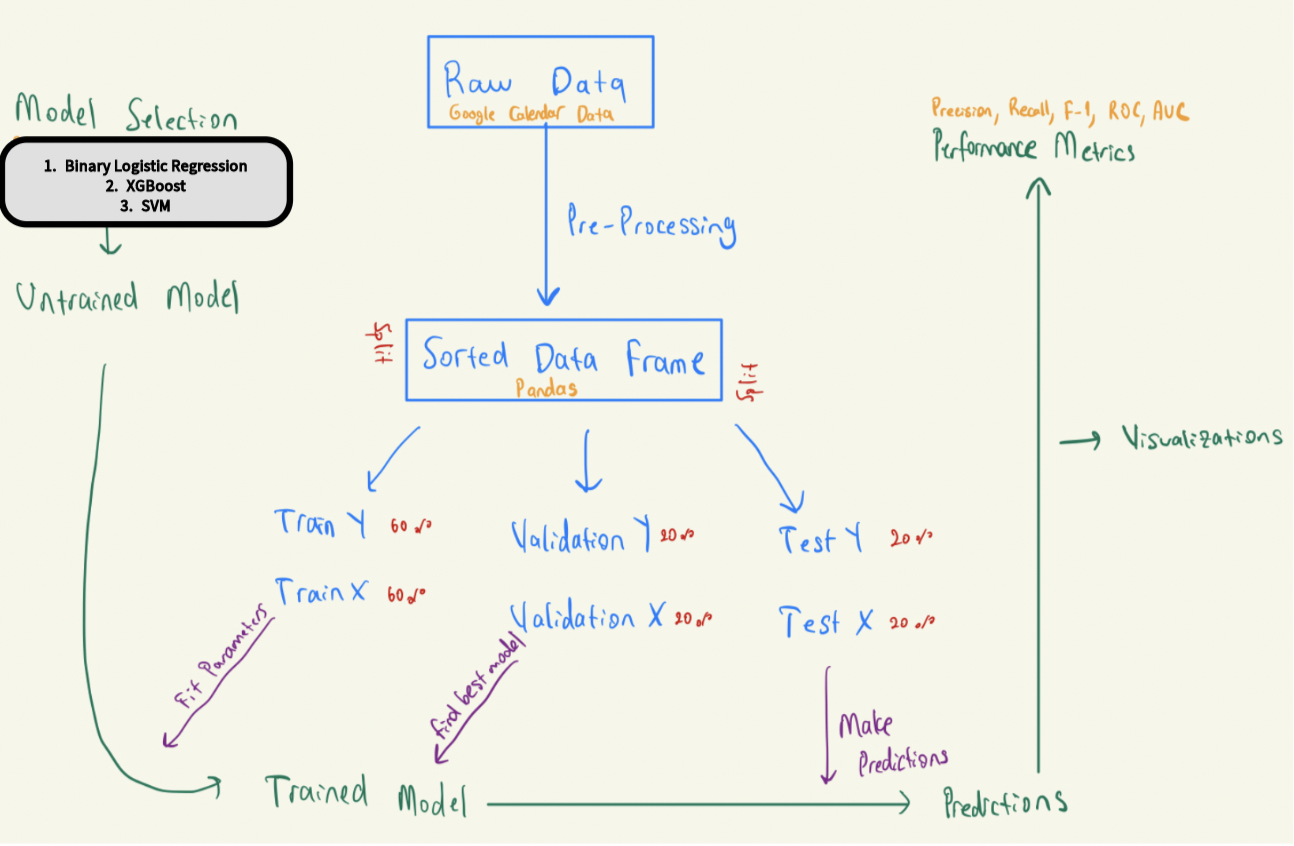

### Shortcomings and Future Directions

#### Shortcomings

One of the primary shortcomings encountered in the second pipeline was balancing the dataset's complexity with the depth of insights it could offer. While the binary classification of mood into "positive" and "negative" streamlined the predictive modeling process, it inevitably reduced the granularity of mood analysis. This simplification potentially overlooks the nuanced spectrum of human emotions, where distinct moods like "stressed" vs. "calm" within the same category could have unique triggers and implications. Furthermore, relying on manual labeling for mood categories, despite its personalized accuracy, introduces a subjective bias that might not generalize well across different individuals or contexts. Although a significant step towards capturing the qualitative aspects of events, the incorporation of textual data presented another layer of complexity. Preprocessing such data to extract meaningful patterns while ensuring the models do not get swayed by noise or irrelevant details was a delicate balance that required careful consideration and could still benefit from further refinement.

Another challenge I faced in this pipeline that limited the extension I could make to my first pipeline was in the effort to train an RNN (Recurrent Neural Network) on my calendar entries to try to generate event summaries and descriptions in my own voice. I have spent significant effort on this, but since I tried to include a mixed group of predictors to train the model (numeric data and text data from event descriptions and summaries) and I wanted to generate new entries with, again, a mixed type of data, I ran into lots of complexity issues. Although my training dataset had only ~500 rows, even my Google Colab RAM wasn't enough to fit this model, and it kept crashing. Outside of the technical problems, I also had several concerns about this approach: (1) My data for training this generative model was too limited, and the generated results would be highly overfit. (2) The combined model for handling numeric and text data could become complex, and it could require a lot of fine-tuning and experimentation with architecture and hyperparameters to get high-quality synthetic data.

#### Future Directions

To address the identified shortcomings and elevate the model's predictive power, several future directions could be implemented in the final pipeline. Firstly, experimenting with dimensionality reduction techniques like PCA in various sizes could offer a more focused set of features, potentially enhancing model performance by concentrating on the most informative aspects of the data. The exploration of autoencoders as an alternative to PCA might also uncover more complex, non-linear relationships within the data, albeit at a higher computational cost. Additionally, adopting more sophisticated NLP preprocessing methods could unlock deeper insights from the textual data, going beyond basic tokenization and stemming to consider sentiment analysis or named entity recognition for a richer understanding of event descriptions. Expanding the model suite to include CNNs for textual data analysis, as well as experimenting with clustering techniques like k-means and hierarchical clustering, could provide new perspectives on the data's structure and the underlying patterns of mood variation. However, we should keep in mind that implementing these advancements will require a careful trade-off between computational demand, model interpretability, and the potential for uncovering actionable insights that could further the project's goal of using calendar data to predict and improve daily and segment-based mood.

## Section 10: References

Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD '16). ACM, New York, NY, USA. https://doi.org/10.1145/2939672.2939785

DSCM. (n.d.). The Kernel Trick. Retrieved from https://dscm.quora.com/The-Kernel-Trick

How to download your Google data - Google Account Help. (n.d.). https://support.google.com/accounts/answer/3024190?hl=en 

Jurafsky, D., & Martin, J. H. (n.d.). Speech and Language Processing (3rd ed.). Retrieved from https://web.stanford.edu/~jurafsky/slp3/5.pdf

Multinomial Logistic Regression | STATA Data Analysis Examples. (n.d.). https://stats.oarc.ucla.edu/stata/dae/multinomiallogistic-regression/

Muralidharan, A. (2019, January 31). Parsing Google Calendar events with Python. Qxf2 BLOG. https://qxf2.com/blog/google-calendar-python/ 

Murphy, K. (2012). Machine Learning : A Probabilistic Perspective. http://cds.cern.ch/record/1981503

## Datasets

https://drive.google.com/drive/folders/1RPFU1FW_9cd9N-Gq0C1ElE3ytBt3dXeU?usp=sharing

## Use of AI Tools Statement

For this report, I used ChatGPT-4 to craft the code required for all visual representations. Additionally, after supplying it with essential points in bullet format, I asked for its assistance in condensing my written narratives. To facilitate the training and testing phases of my model construction, I also turned to it for guidance on the necessary library imports. For final edits and corrections, I employed Grammarly.